# Diabetes detection
- This project will focus on detecting whether a person suffers form diabetes.
- The dataset we will use is available from [Kaggle](https://www.kaggle.com/datasets/prosperchuks/health-dataset).

## Data exploration
- First we will familiarize ourselves with the available data using visualisations a descriptive statistics.

In [1]:
import pandas as pd 
from pandas.api.types import CategoricalDtype
import numpy as np 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
import sklearn.metrics as metrics
from mlxtend.plotting import plot_decision_regions
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.perf import ROC
from dtreeviz import model

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# font family arial not found error 
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

# styling
sns.set_style("darkgrid")
palette = sns.color_palette("hls", 10)
sns.set_palette(palette)

df = pd.read_csv("diabetes_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

- The dataset contains around 70 thousand entries, none of which are missing any values.

### Summary of each feature
1. `Age`: categoric feature with 13 categories, where the value of one represents the age group 18-24, the following categories all represent a five year span, wih the last category being 80+.
2. `Sex`: binary feature, where one signifies a male and 0 a female.
3. `HighChol`: binary feature, value of one means high cholesterol.  
4. `CholCheck`: binary feature, value of one means the patient has had their cholesterol checked in the past five years.  
5. `BMI`: feature with discrete values, representing the Body Mass Index of the patient.
6. `Smoker`: binary feature, where one corresponds with a patient that has smoked at least 100 cigaretes in their life.
7. `HeartDiseaseorAttack`: binary feature, where a value of one indicates that the patient has undergone a heart attack or suffers from  coronary heart disease.
8. `PhysActivity`: binary feature, where a value of one means the patient has done some physical activity in the last 30 days.
9. `Fruits`: binary feature, where a value of one means the patient eats fruit at least once a day.
10. `Veggies`: binary feature, where a value of one means the patient eats vegetables at least once a day.
11. `HvyAlcoholConsump`: binary feature, where a value of one means the patient has at least 14 drinks per week if he is male and 7 drinks a week for a female patient.
12. `GenHlth`: feature with discrete values from 1 to 5, with a self assigned rating of their general health, where a value of one means perfect health.  
13. `MentHlth`: discrete feature, corresponding to the number of days in the last month, where the patient suffered from mental health issues. 
14. `PhysHlth`: discrete feature, corresponding to the number of days in the last month, where the patient suffered from physical health issues. 
15. `DiffWalk`: binary feature, where a value of one means they experience difficulty walking up stairs.
16. `Stroke`: binary feature, where a value of one means they suffered a stroke.
17. `HighBP`: binary feature, where a value of one means they have high blood pressure.
18. `Diabetes`: binary target feature. The value of one corresponds with a patient with diabetes. 

- We will now convert the representation of the features where necessary.

In [2]:
df["Age"] = pd.cut(df["Age"], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
                   labels=["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54",
                           "55-59", "60-64", "65-69", "70-74", "75-79", "80+"])
df["Sex"] = pd.cut(df["Sex"], bins=[-0.1, 0.5, 1], labels=["Female", "Male"], ordered=False)
df["HighChol"] = pd.cut(df["HighChol"], bins=[-0.1, 0.5, 1], labels=["High", "Normal"], ordered=False)
df["CholCheck"] = pd.cut(df["CholCheck"], bins=[-0.1, 0.5, 1], labels=["False", "True"], ordered=False)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = pd.cut(df["Smoker"], bins=[-0.1, 0.5, 1], labels=["Non-smoker", "Smoker"], ordered=False)
df["HeartDiseaseorAttack"] = pd.cut(df["HeartDiseaseorAttack"], bins=[-0.1, 0.5, 1], labels=["False", "True"], ordered=False)
df["PhysActivity"] = pd.cut(df["PhysActivity"], bins=[-0.1, 0.5, 1], labels=["False", "True"], ordered=False)
df["Fruits"] = pd.cut(df["Fruits"], bins=[-0.1, 0.5, 1], labels=["False", "True"], ordered=False)
df["Veggies"] = pd.cut(df["Veggies"], bins=[-0.1, 0.5, 1], labels=["False", "True"], ordered=False)
df["HvyAlcoholConsump"] = pd.cut(df["HvyAlcoholConsump"], bins=[-0.1, 0.5, 1], labels=["High", "Normal"], ordered=False)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = pd.cut(df["DiffWalk"], bins=[-0.1, 0.5, 1], labels=["False", "True"], ordered=False)
df["Stroke"] = pd.cut(df["Stroke"], bins=[-0.1, 0.5, 1], labels=["False", "True"], ordered=False)
df["HighBP"] = pd.cut(df["HighBP"], bins=[-0.1, 0.5, 1], labels=["High", "Normal"], ordered=False)
df["Diabetes"] =  pd.cut(df["Diabetes"], bins=[-0.1, 0.5, 1], labels=["False", "True"], ordered=False)

df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,35-39,Male,High,True,26,Non-smoker,False,True,False,True,High,3,5,30,False,False,Normal,False
1,75-79,Male,Normal,True,26,Smoker,False,False,True,False,High,3,0,0,False,True,Normal,False
2,80+,Male,High,True,26,Non-smoker,False,True,True,True,High,1,0,10,False,False,High,False
3,70-74,Male,Normal,True,28,Smoker,False,True,True,True,High,3,0,3,False,False,Normal,False
4,55-59,Female,High,True,29,Smoker,False,True,True,True,High,2,0,0,False,False,High,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   70692 non-null  category
 1   Sex                   70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  int64   
 5   Smoker                70692 non-null  category
 6   HeartDiseaseorAttack  70692 non-null  category
 7   PhysActivity          70692 non-null  category
 8   Fruits                70692 non-null  category
 9   Veggies               70692 non-null  category
 10  HvyAlcoholConsump     70692 non-null  category
 11  GenHlth               70692 non-null  int64   
 12  MentHlth              70692 non-null  int64   
 13  PhysHlth              70692 non-null  int64   
 14  DiffWalk              70692 non-null  category
 15  St

## Analysis of each feature
- Starting off with `Age`.

,Frequency,Relative frequency
Age,,
65-69,10856,0.153568
60-64,10112,0.143043
55-59,8603,0.121697
70-74,8044,0.113789
50-54,6872,0.097210
80+,5426,0.076756
75-79,5394,0.076303
45-49,4648,0.065750
40-44,3520,0.049793


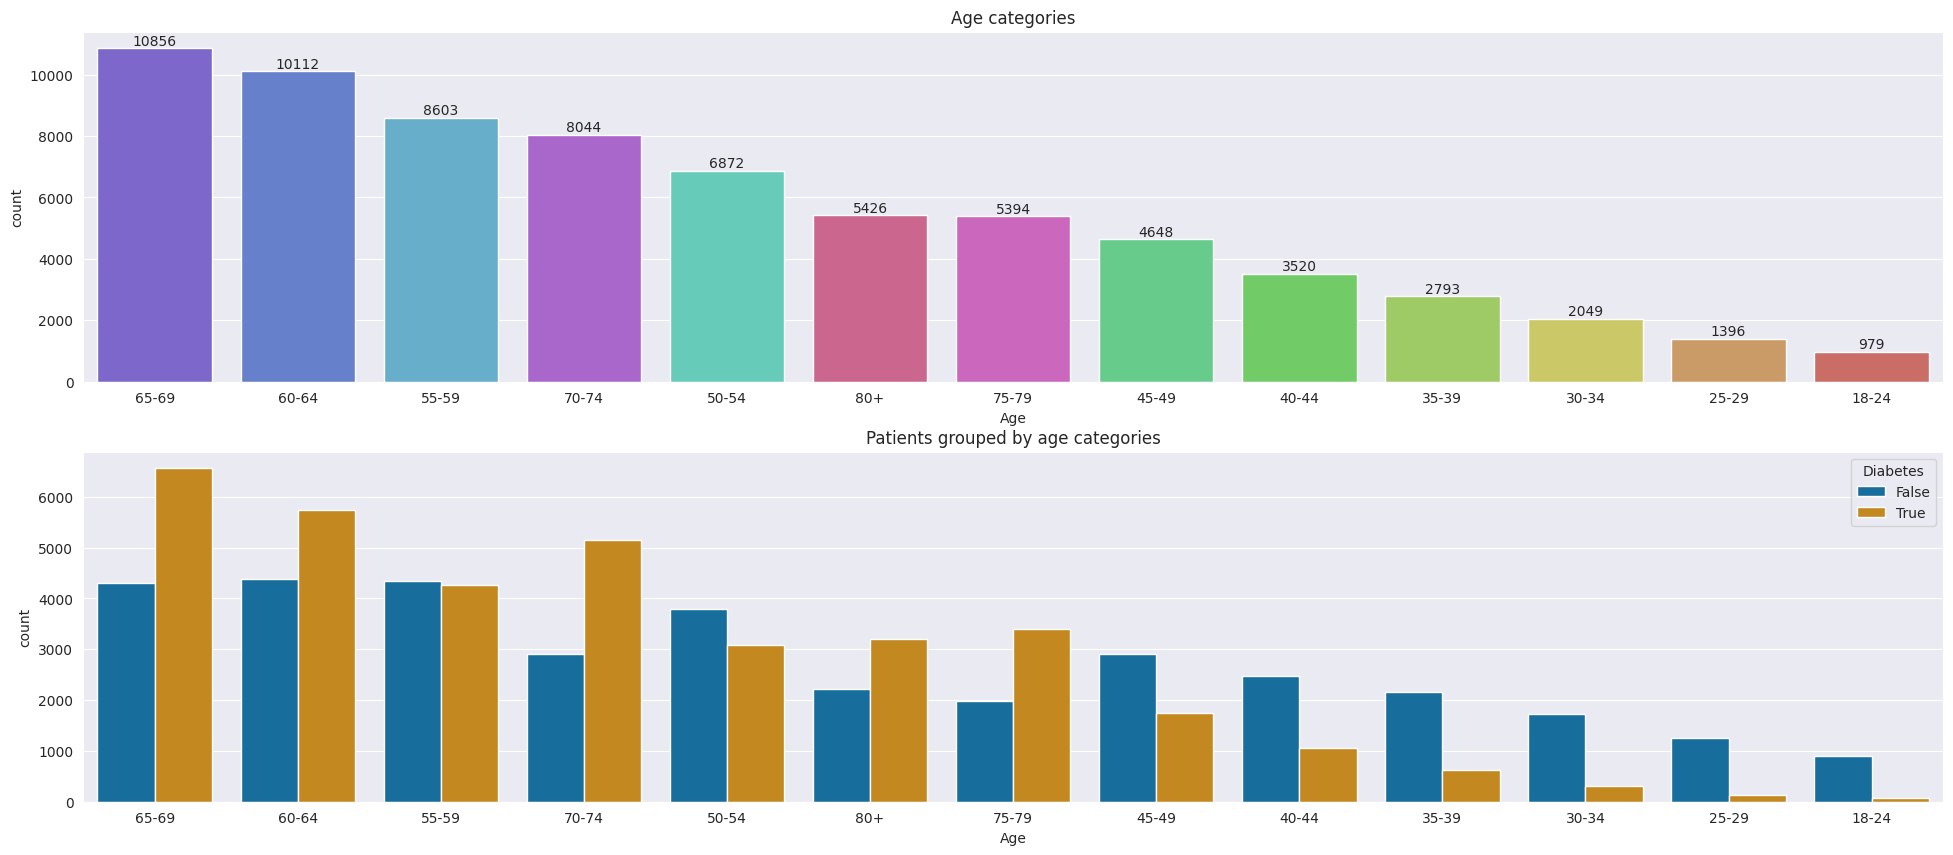

In [4]:
def univ_ds_c(df, column, name=None, name2=None, fsize=(16, 10)):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    display(stats_df)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=fsize)
    sns.countplot(data=df, x=column, hue=column, palette="hls", order=df[column].value_counts().index, ax=ax1).set(title=name)
    for cont in ax1.containers:
        ax1.bar_label(cont)
    sns.countplot(data=df, x=column, hue="Diabetes", palette="colorblind", order=df[column].value_counts().index, ax=ax2).set(title=name2)

univ_ds_c(df, "Age", "Age categories", "Patients grouped by age categories", (24, 10))

- From the first graph, we can notice that among the patients, the majority are of higher age, most often between 65 and 69 years old. The least represented category is those aged 18 to 24.
- The second graph shows the split of patients in the age groups based on if they have diabetes. The healthy people dominate in the younger ages, while the opposite is true for the older ages.
- Moving on to the `Sex` attribute.

,Frequency,Relative frequency
Sex,,
Female,38386,0.543003
Male,32306,0.456997


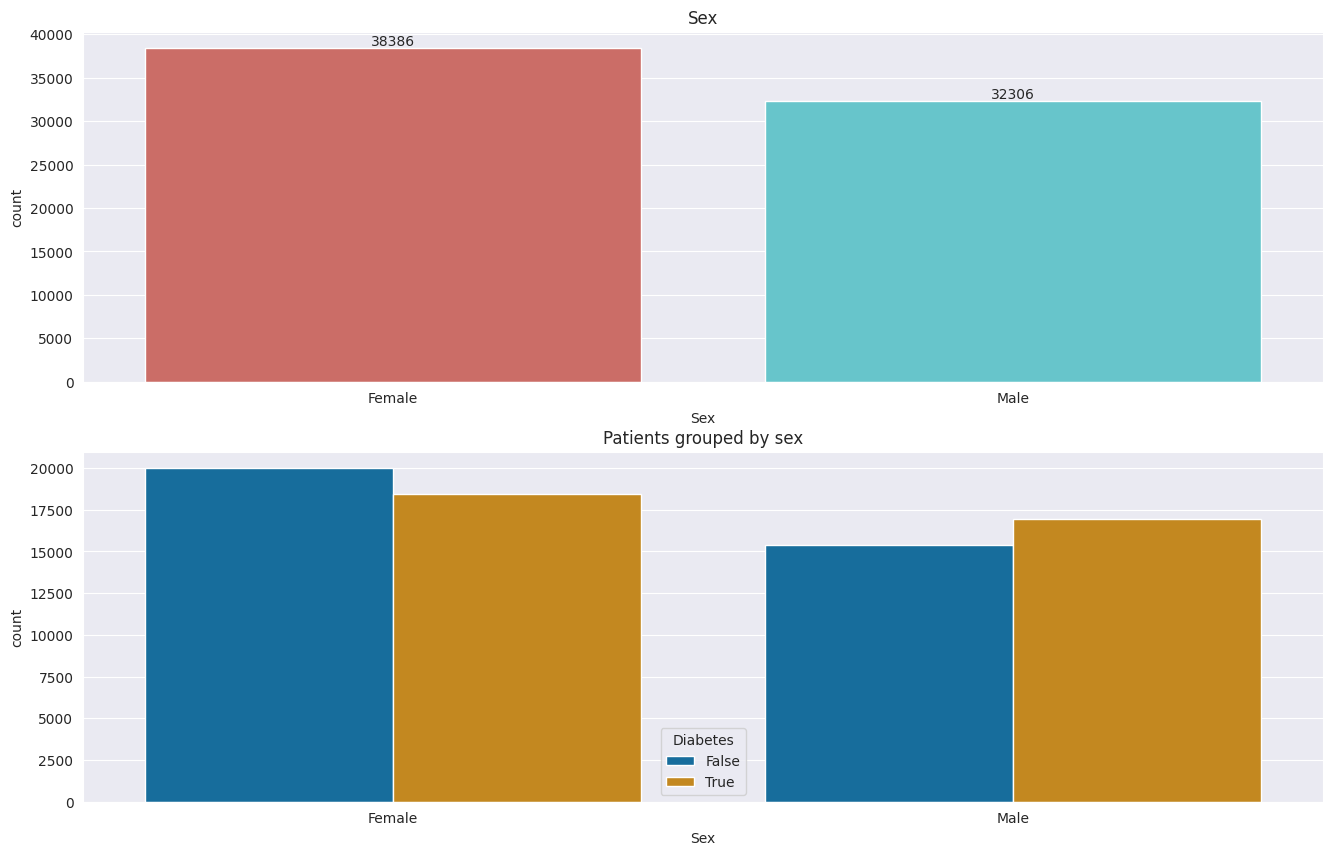

In [5]:
univ_ds_c(df, "Sex", "Sex", "Patients grouped by sex")

- The dataset contains slightly more women.
- There seems to be a slightly higher percentage of healthy females, with the opposite being the case for males.
- Next feature we will examine will be `HighChol`.

,Frequency,Relative frequency
HighChol,,
Normal,37163,0.525703
High,33529,0.474297


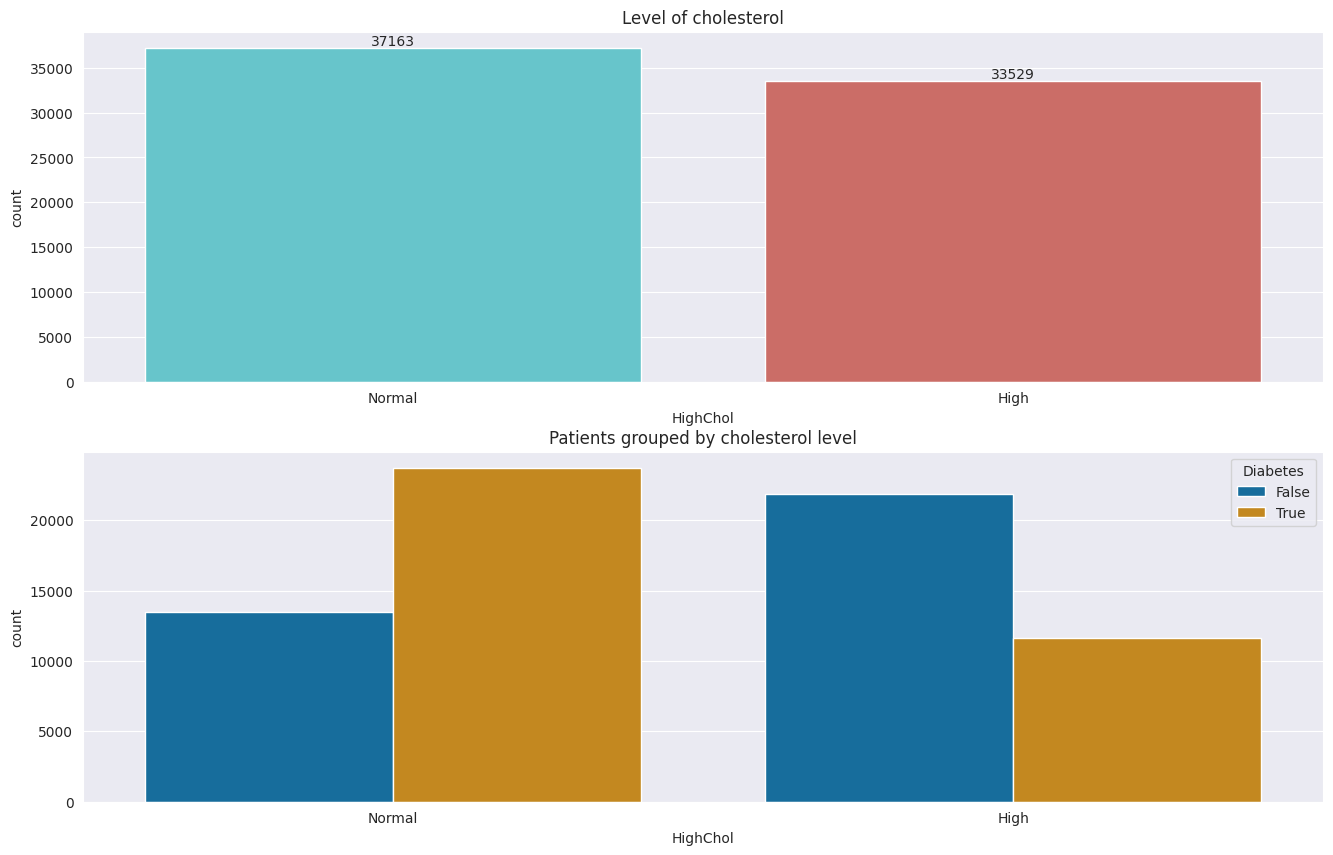

In [6]:
univ_ds_c(df, "HighChol", "Level of cholesterol", "Patients grouped by cholesterol level")

- Once again, we have a pretty balanced ratio between those with high cholesterol and those with normal cholesterol.
- The second graph makes it clear that whether a person has high cholesterol is a good indicator of whether they have diabetes. 
- Now we will examine `CholCheck`.

,Frequency,Relative frequency
CholCheck,,
True,68943,0.975259
False,1749,0.024741


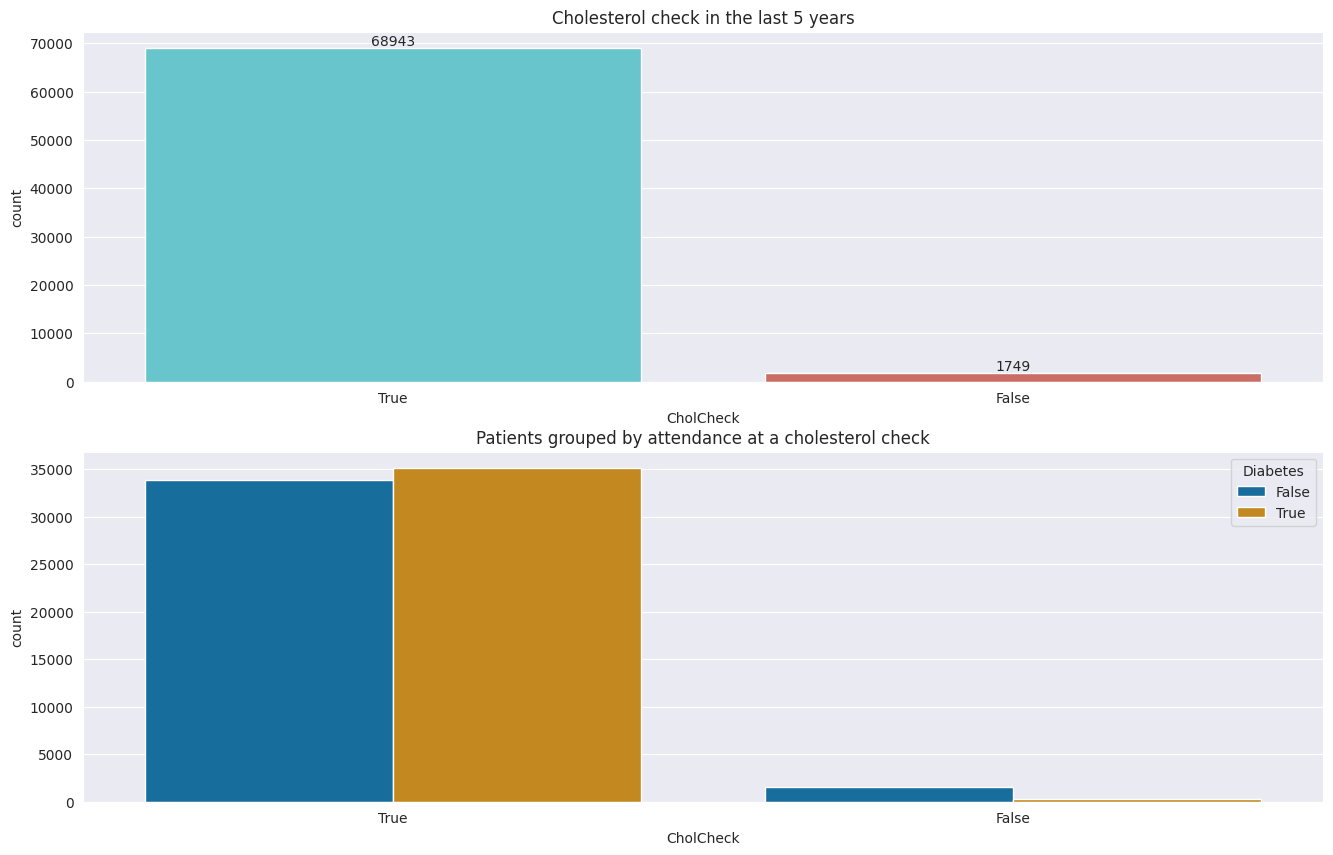

In [7]:
univ_ds_c(df, "CholCheck", "Cholesterol check in the last 5 years", "Patients grouped by attendance at a cholesterol check")

- We can see that the vast majority of patients have had their cholesterol checked sometime in the last 5 years. So this symptom is almost a constant and we should consider whether it is useful.
- Next up is the `BMI`.

Average 		 29.85699
Median  		 29.0
Standard deviation 	 7.11390
Variance 		 50.60834
Minimal value 		 12
Maximal value 		 98
Range 			 86


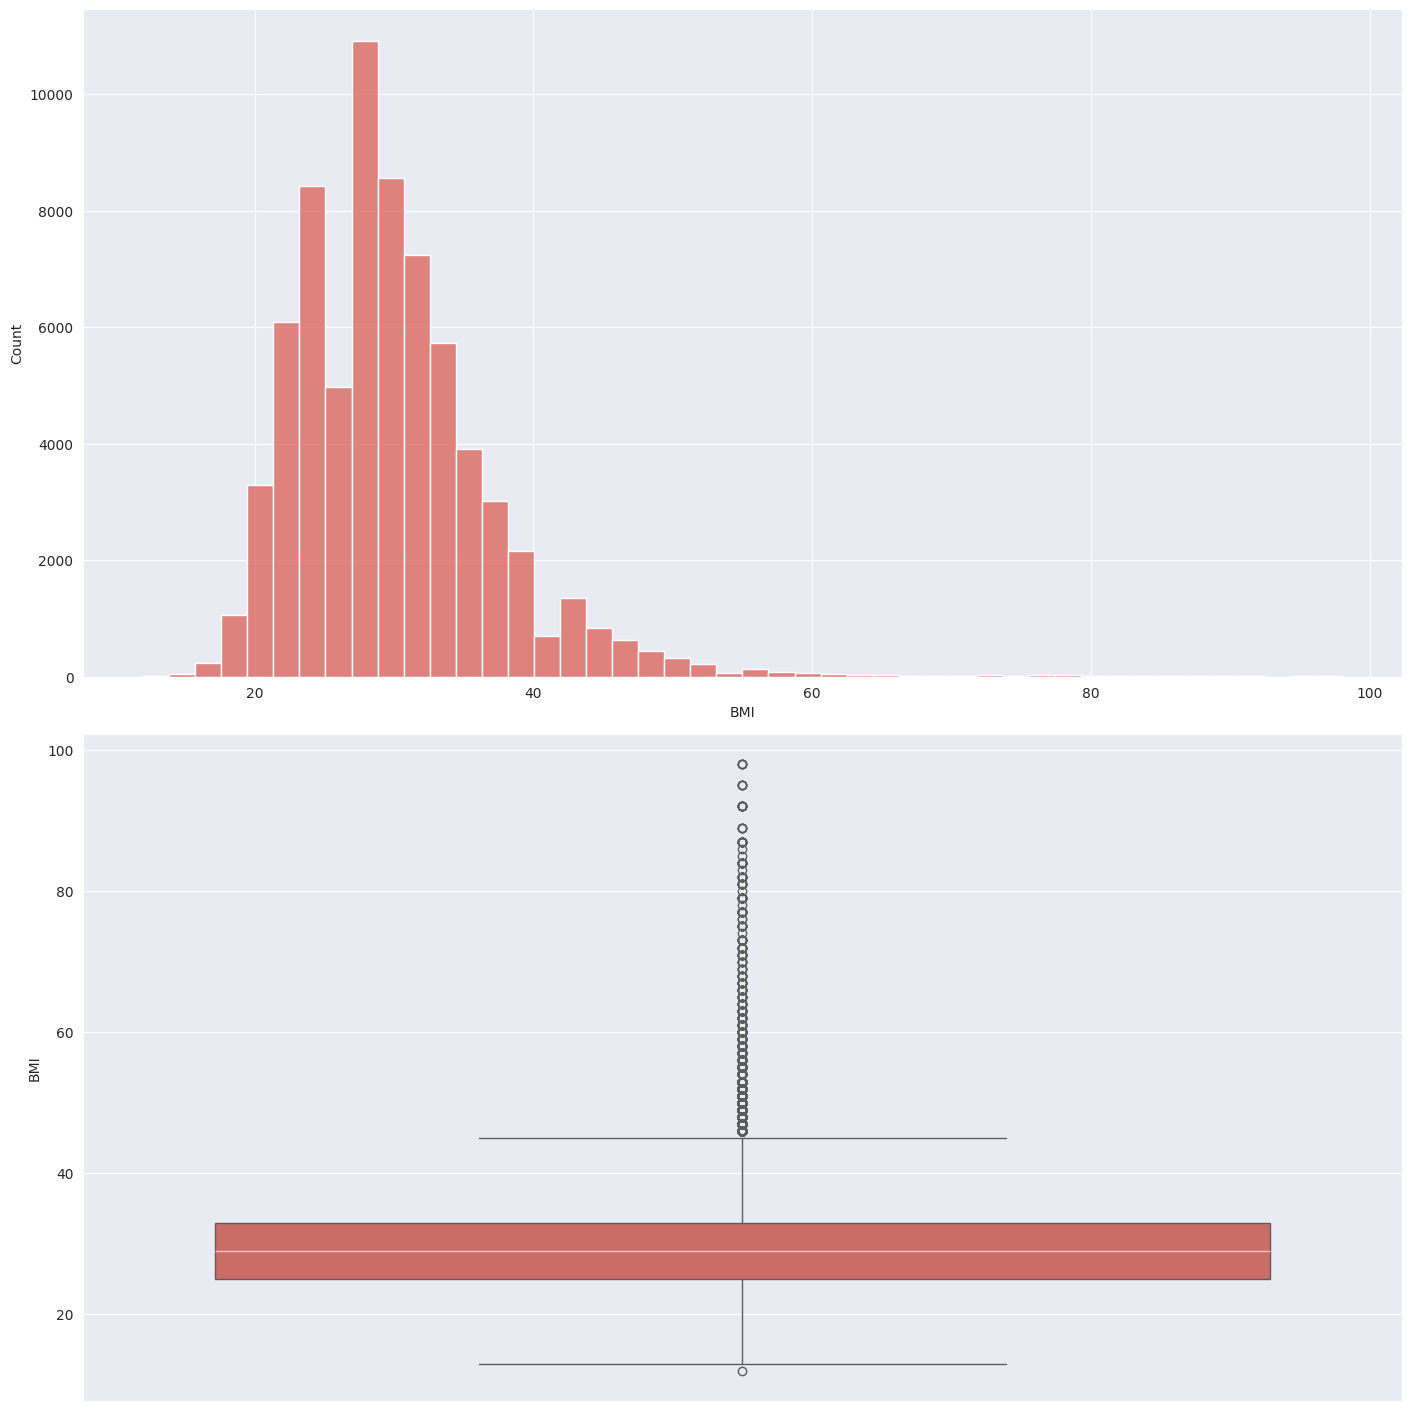

In [8]:
def print_df(df,column):
    print("Average \t\t", "{0:.5f}".format(df[column].mean()))
    print("Median  \t\t", df[column].median())
    print("Standard deviation \t", "{0:.5f}".format(np.std(df[column])))
    print("Variance \t\t", "{0:.5f}".format(df[column].var()))
    print("Minimal value \t\t", df[column].min())
    print("Maximal value \t\t", df[column].max()) 
    print("Range \t\t\t", df[column].max() - df[column].min())
    

def univ_ds(df, column, BoxPlot=True):
    stats_df = pd.DataFrame(np.array([
        ["Average", df[column].mean()],
        ["Median", df[column].median()],
        ["Standard deviation", np.std(df[column])],
        ["Variance", df[column].var()],
        ["Minimal value", df[column].min()],
        ["Maximal value", df[column].max()], 
        ["Range", df[column].max() - df[column].min()],
    ]), columns = ['Title', 'Value'])
    
    bin_cnt = int((df[column].max() - df[column].min()) / 2) + 3
    print_df(df,column)
    fig = plt.figure(figsize=(14,14), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :])  
    sns.histplot(data=df, x=column, ax=ax1, bins=bin_cnt)
    # otočení os
    if BoxPlot:
        ax2 = fig.add_subplot(spec[1, :])
        sns.boxplot(data=df, y=column, ax=ax2, medianprops={"color": "pink"})

univ_ds(df, "BMI")    

- The average BMI and median BMI are just below 30, which is the obesity cutoff. We can see from the graph that we have data on many obese people, but the minimum corresponds to malnutrition. There is a large difference between the maximum and minimum values for this symptom, probably the largest of all the symptoms we have.
- Moving on to the feature `Smoker`.

,Frequency,Relative frequency
Smoker,,
Non-smoker,37094,0.524727
Smoker,33598,0.475273


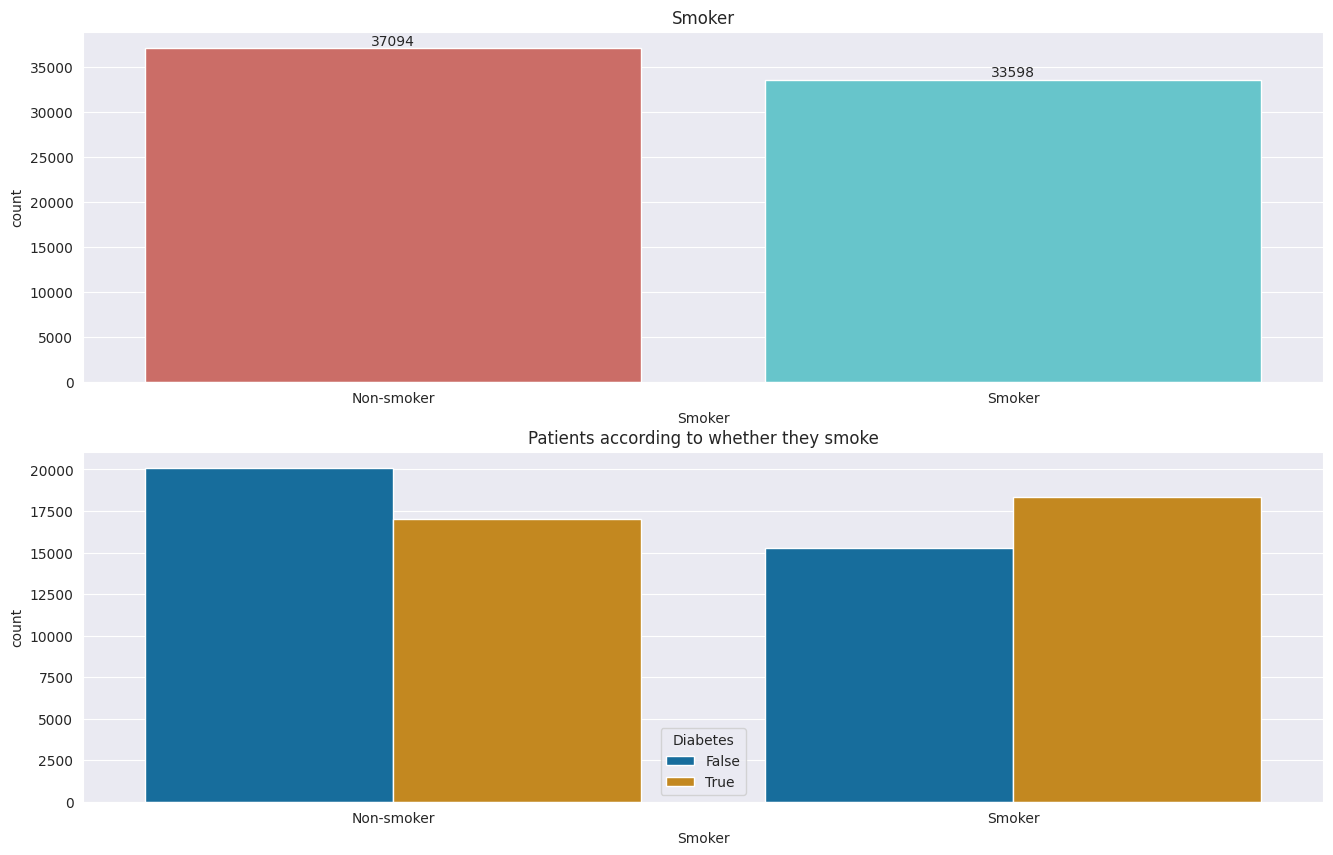

In [9]:
univ_ds_c(df, "Smoker", "Smoker", "Patients according to whether they smoke")

- The ratio of people who have smoked in the past (or still do) to non-smokers is fairly even, with a slight preponderance of non-smokers.
- In the smoker group diabetics prevail. On the contrary, for non-smokers the opposite is true.
- We will now focus on `HeartDiseaseorAttack`.

,Frequency,Relative frequency
HeartDiseaseorAttack,,
False,60243,0.85219
True,10449,0.14781


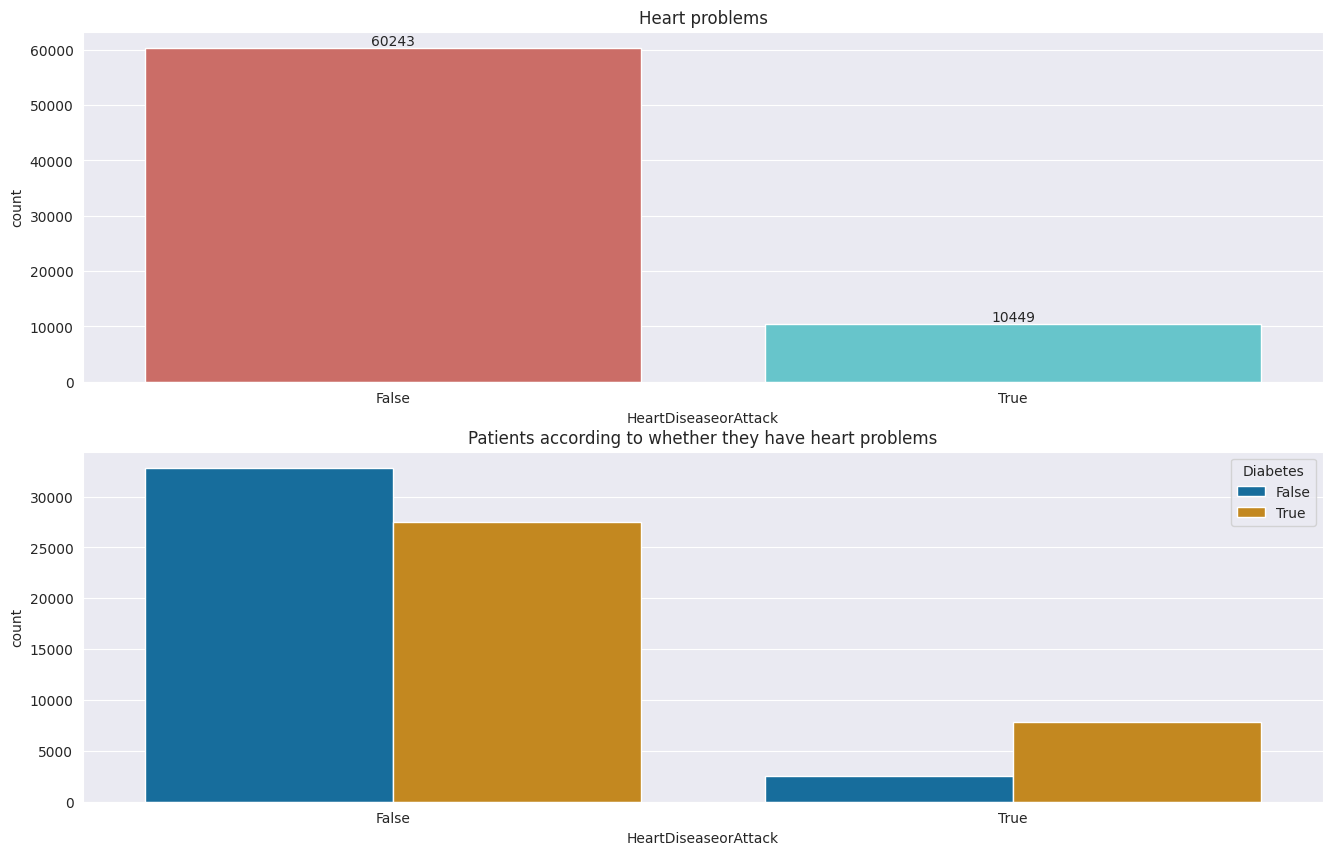

In [10]:
univ_ds_c(df, "HeartDiseaseorAttack", "Heart problems", "Patients according to whether they have heart problems")

- The vast majority of people do not suffer from coronary heart disease or myocardial infarction, but there are enough people who have some of these problems that we don't want to dismiss this feature.
- As can be seen in the second graph, the vast majority of these people also have diabetes, so this symptom may be significant.
- We will now look at `PhysActivity`.

,Frequency,Relative frequency
PhysActivity,,
True,49699,0.703036
False,20993,0.296964


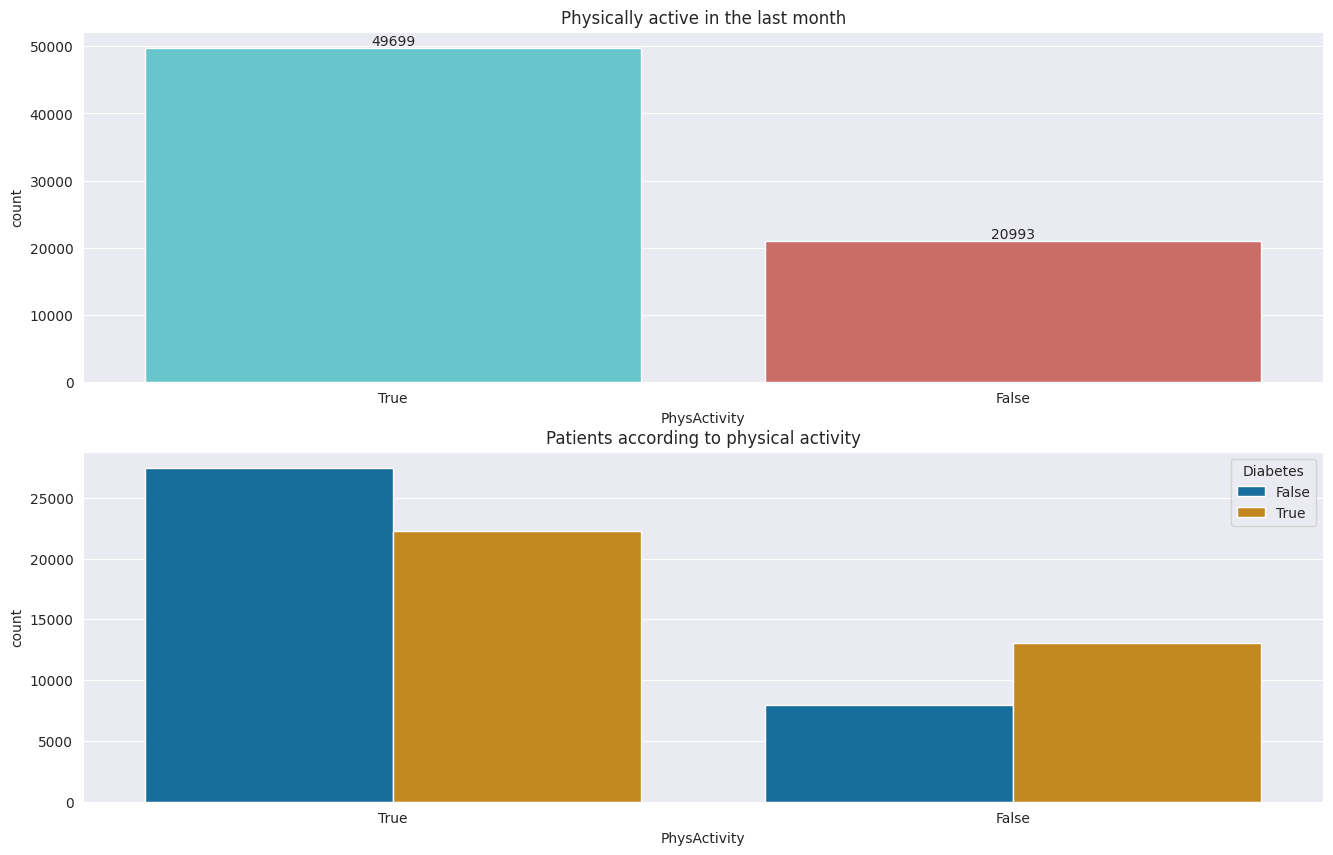

In [11]:
univ_ds_c(df, "PhysActivity", "Physically active in the last month", "Patients according to physical activity")

- As we can see, most people have done some form of physical activity in the last 30 days. Quite a surprising number of people, in my opinion, given that the data is dominated by older people and the average person (in the data) is overweight.
- Unsurprisingly, people who are physically active have diabetes less often than others.
- We will continue with `Fruits` and `Veggies`, which focus on the persons diet. 

,Frequency,Relative frequency
Fruits,,
True,43249,0.611795
False,27443,0.388205


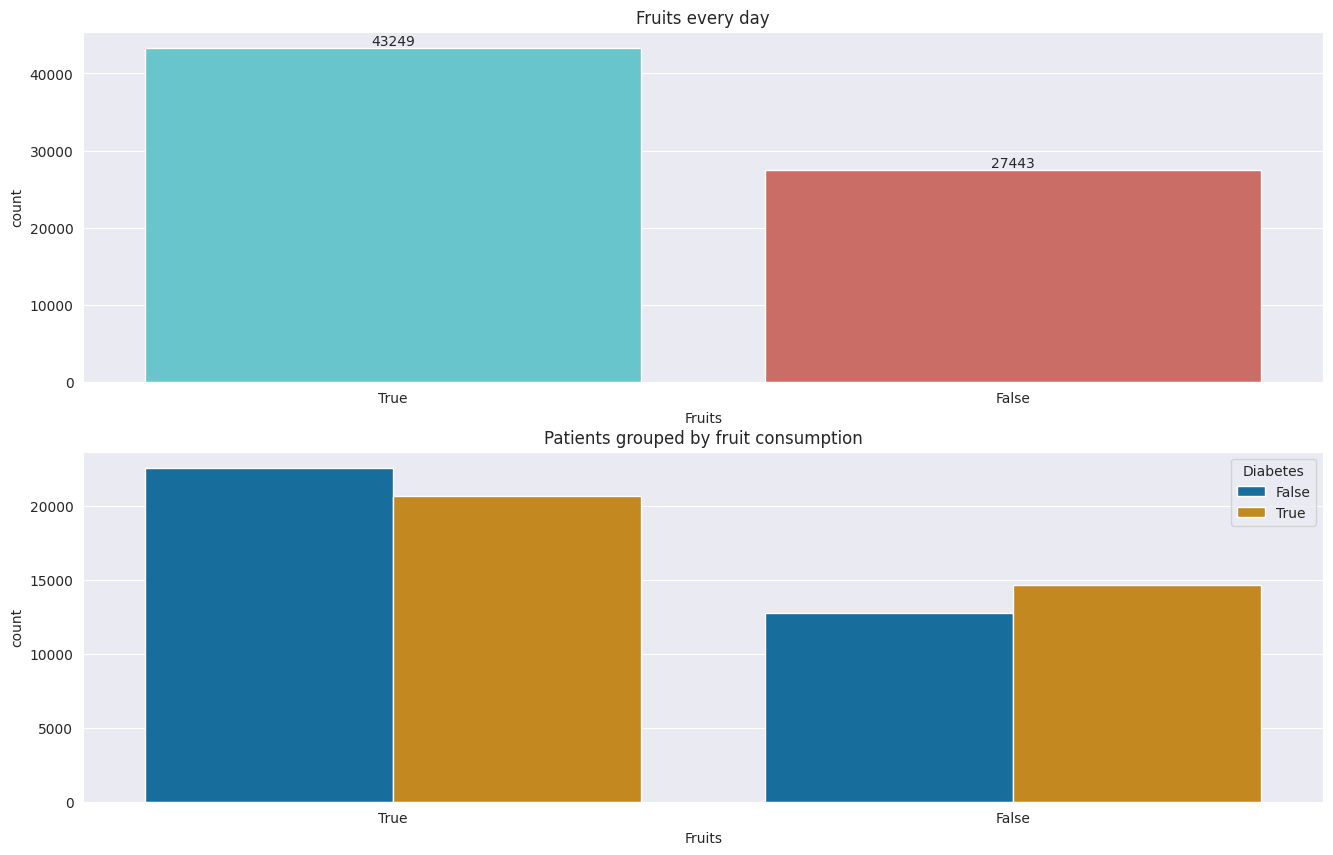

In [12]:
univ_ds_c(df, "Fruits", "Fruits every day", "Patients grouped by fruit consumption")

- The majority of people have at least some fruit every day, but surprisingly many people do not fall into this category.
- In both groups the representation of diabetics is quite similar.   

,Frequency,Relative frequency
Veggies,,
True,55760,0.788774
False,14932,0.211226


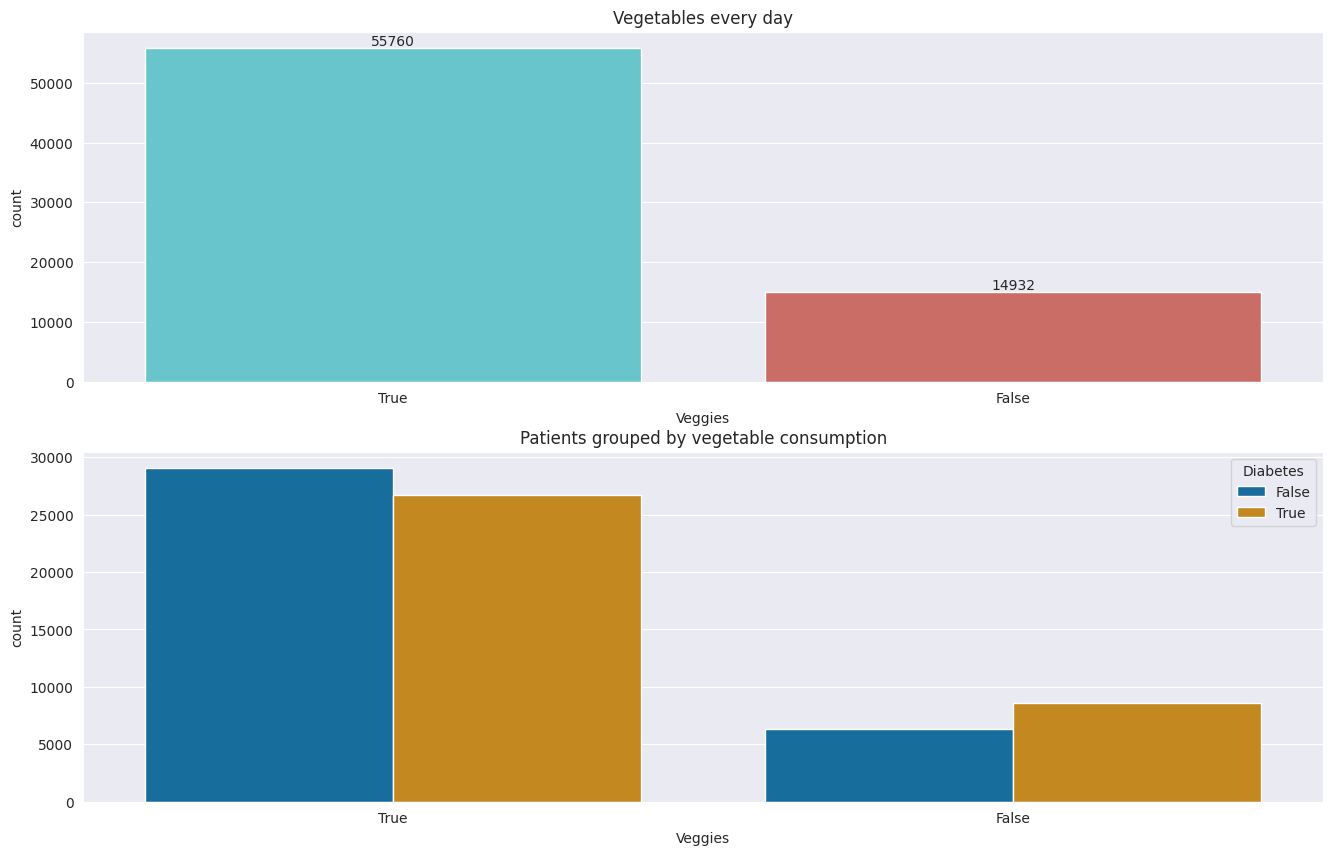

In [13]:
univ_ds_c(df, "Veggies", "Vegetables every day", "Patients grouped by vegetable consumption")

- For vegetable consumption it is not as bad as for fruit, the prevalence of people who have at least some vegetables every day is a bit more pronounced.
- The second graph is very similar to the situation for fruit consumption.
- Next feature we will examine is `HvyAlcoholConsump`.

,Frequency,Relative frequency
HvyAlcoholConsump,,
High,67672,0.957279
Normal,3020,0.042721


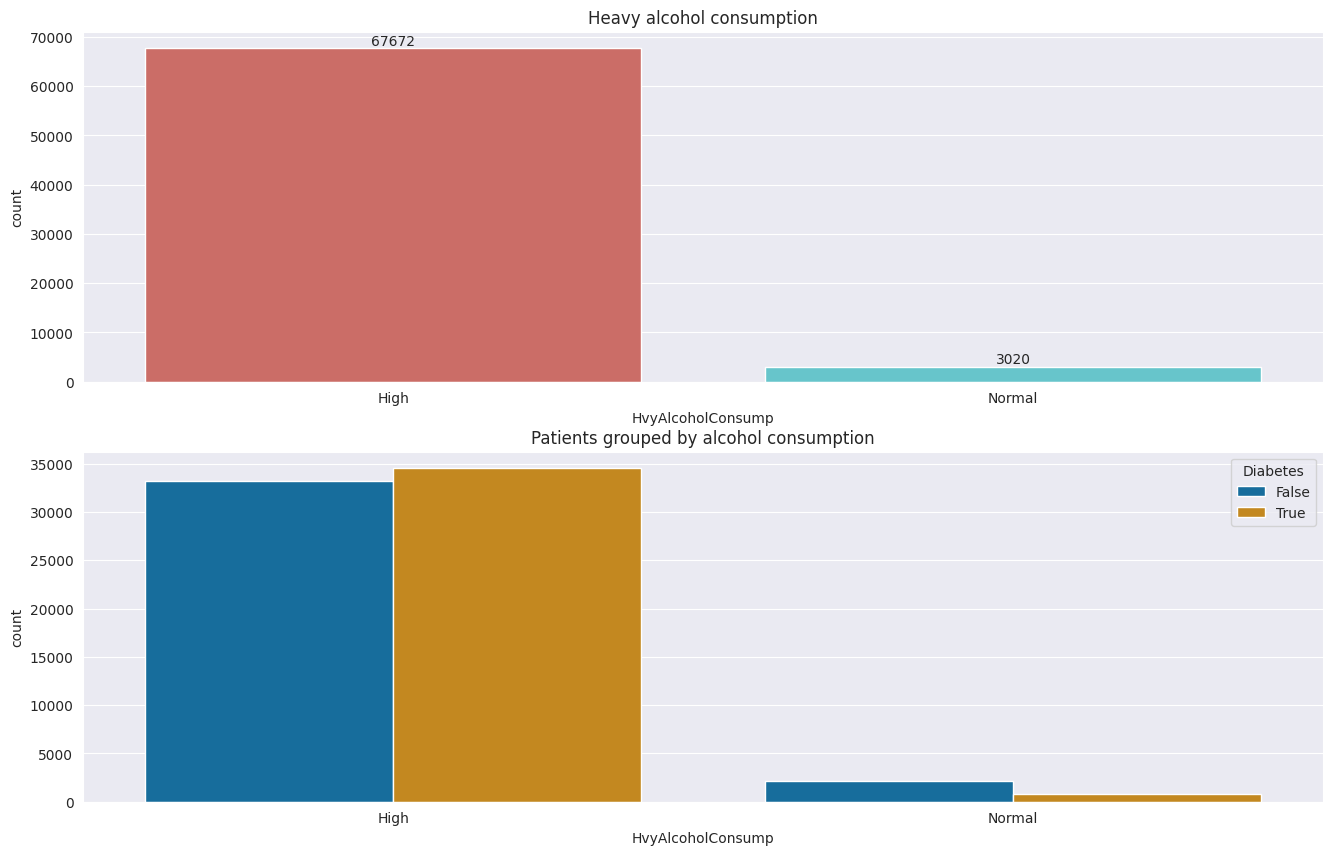

In [14]:
univ_ds_c(df, "HvyAlcoholConsump", "Heavy alcohol consumption", "Patients grouped by alcohol consumption")

- The vast majority of people do not consume excessive amounts of alcohol and we get another candidate for possible discarding if we wanted to reduce the number of features.
- In the second visualisation, we may be surprised to find that people who drink too much alcohol are significantly outnumbered by people who do not have diabetes, based on this data.
- Moving on to `GenHlth`.

Average 		 2.83708
Median  		 3.0
Standard deviation 	 1.11356
Variance 		 1.24003
Minimal value 		 1
Maximal value 		 5
Range 			 4


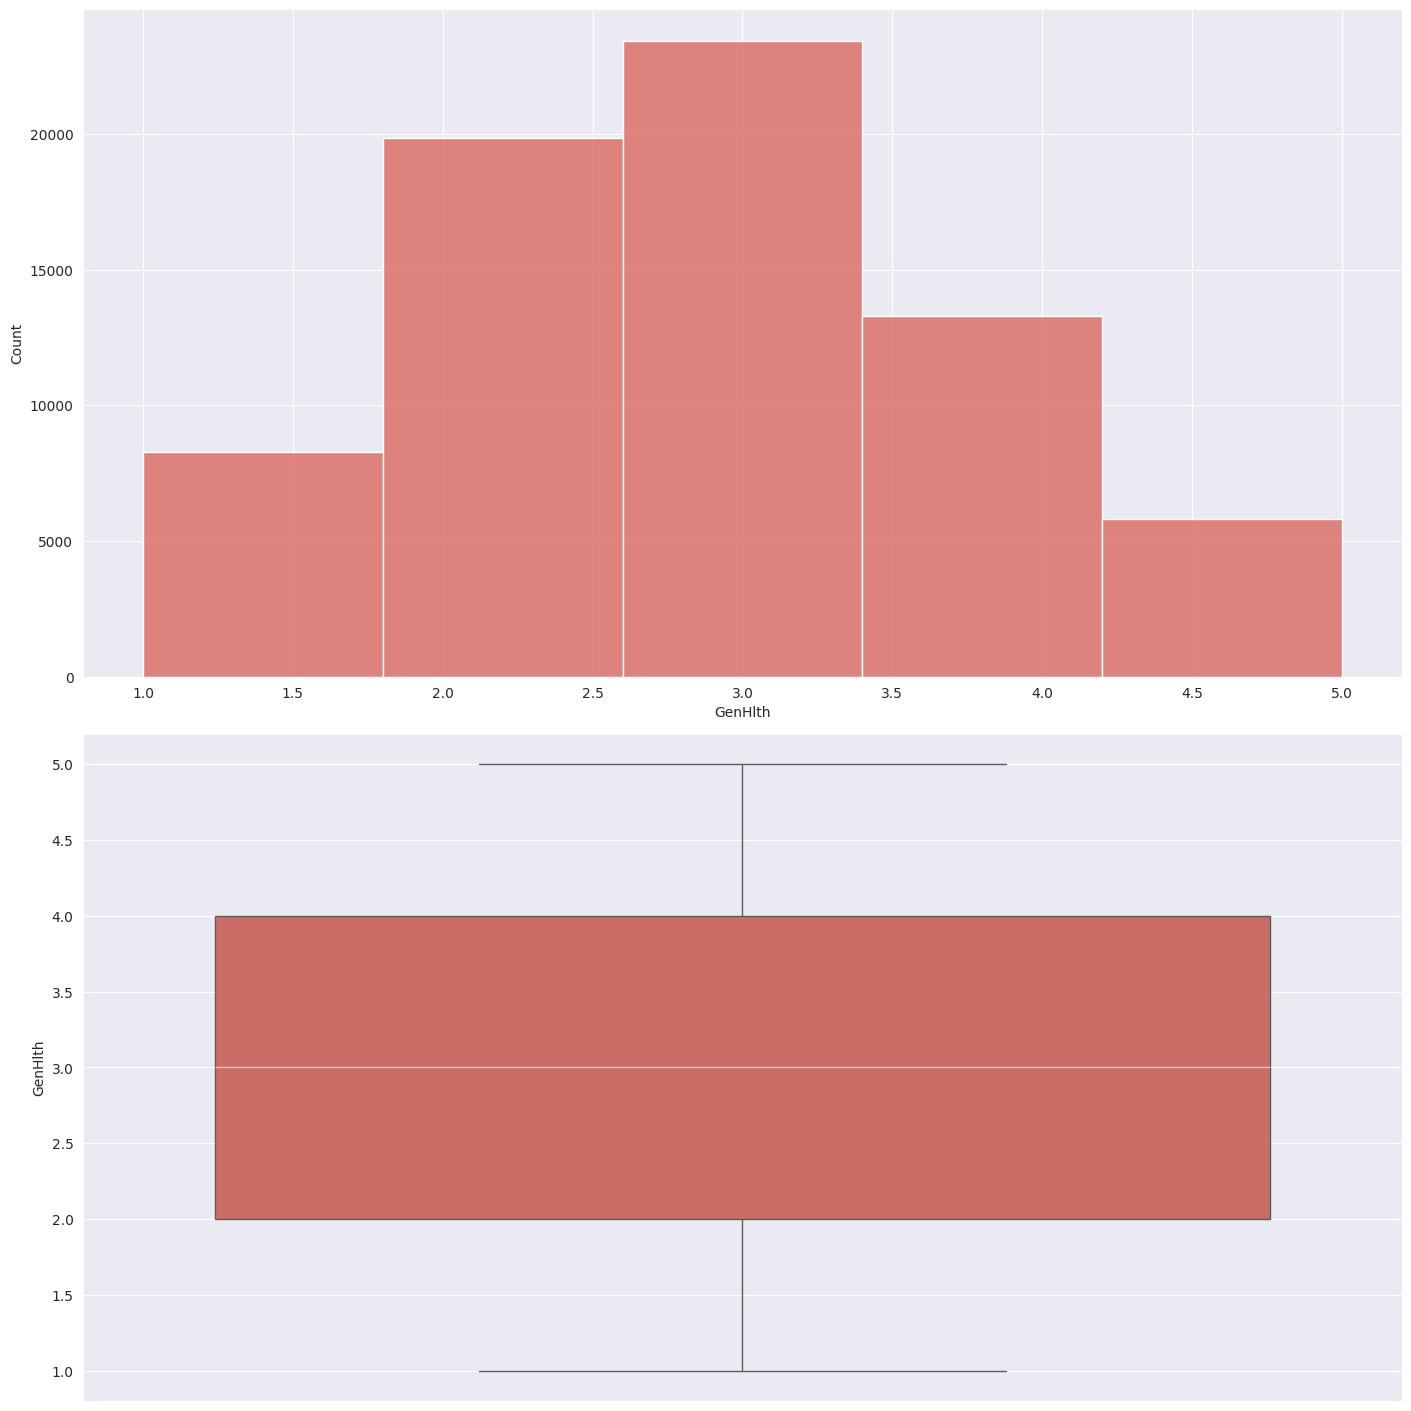

In [15]:
univ_ds(df, "GenHlth")

- Most of the people surveyed rate their general health as rather good, but the assessment is subjective, so it is difficult to say whether this feature has any telling value about their true condition. 
- Next we will examine a similar feature: `MentHlth`. 

Average 		 3.75204
Median  		 0.0
Standard deviation 	 8.15557
Variance 		 66.51424
Minimal value 		 0
Maximal value 		 30
Range 			 30


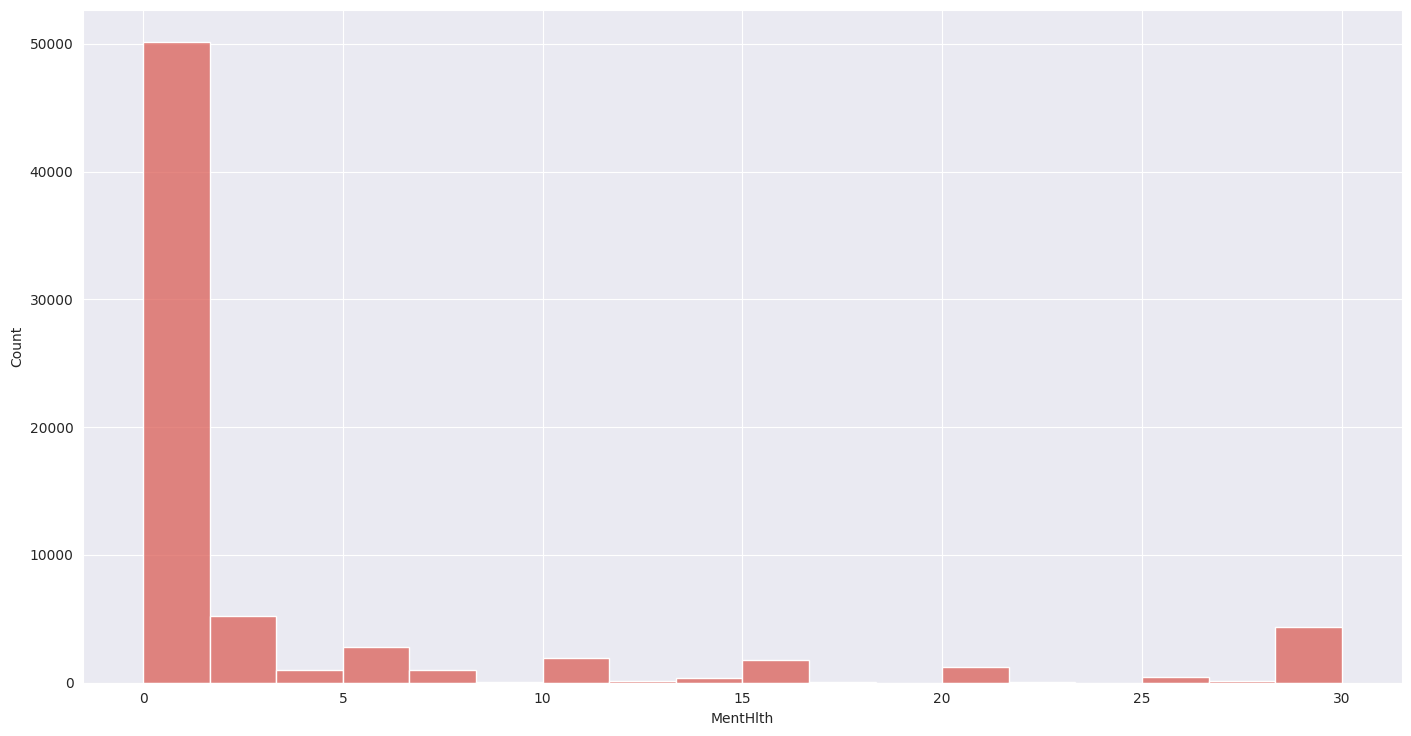

In [16]:
univ_ds(df, "MentHlth", False)

- The vast majority of people had not suffered any mental health problems in the last month, but there were some people who suffered problems every day.
- It is difficult to say if this feature has any value for diabetes detection, since there is such a small amount of people that experience mental health issues in the data.
- Moving on to `DiffWalk`.

,Frequency,Relative frequency
DiffWalk,,
False,52826,0.74727
True,17866,0.25273


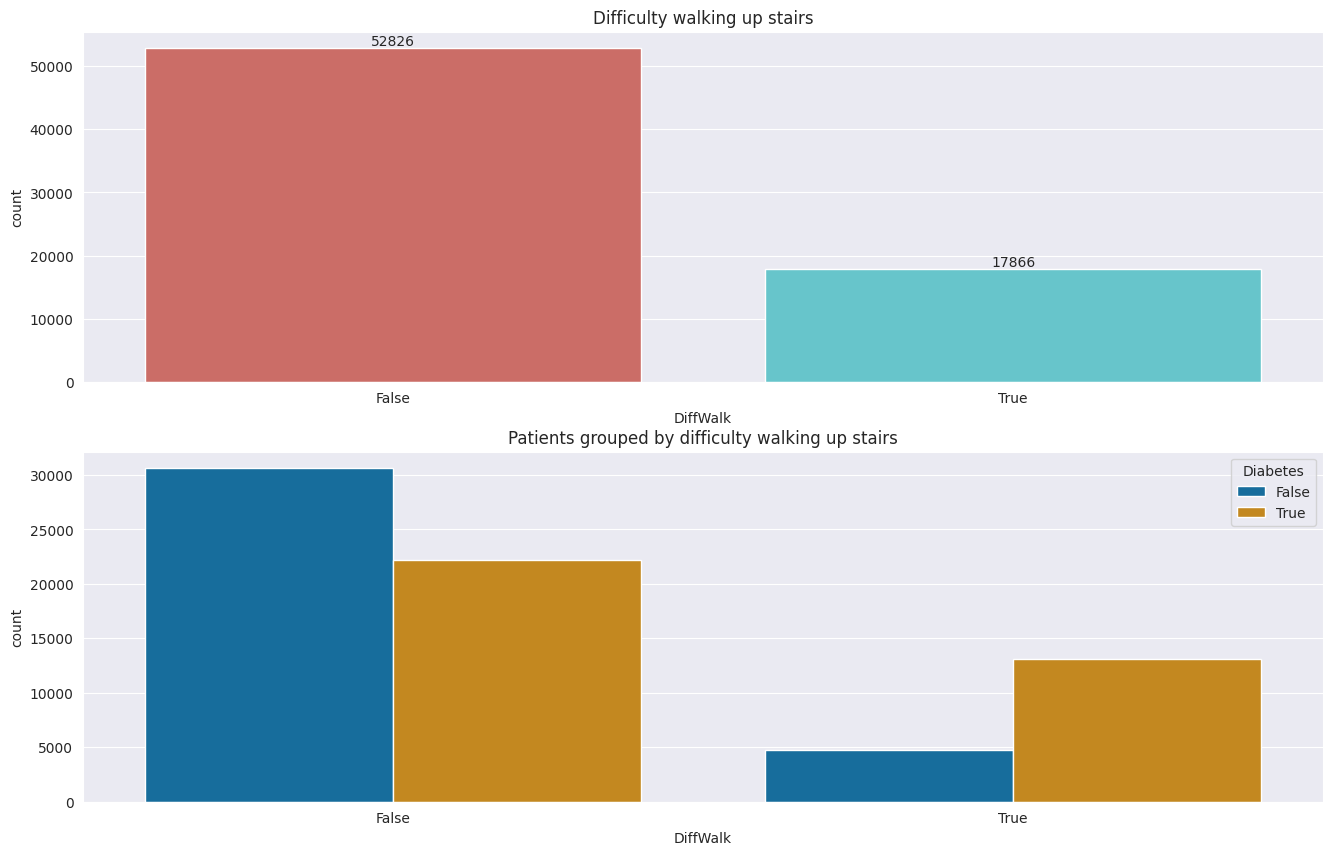

In [17]:
univ_ds_c(df, "DiffWalk", "Difficulty walking up stairs", "Patients grouped by difficulty walking up stairs")

- From the first graph we can see that most people do not have a problem with walking up stairs, but it is not as large a majority as we might expect.
- The second visualisation tells us that this attribute could be important for diabetes detection, as there is quite a large disparity between the percentage of healthy individuals in the group.
- The next attribute is called `Stroke`.

,Frequency,Relative frequency
Stroke,,
False,66297,0.937829
True,4395,0.062171


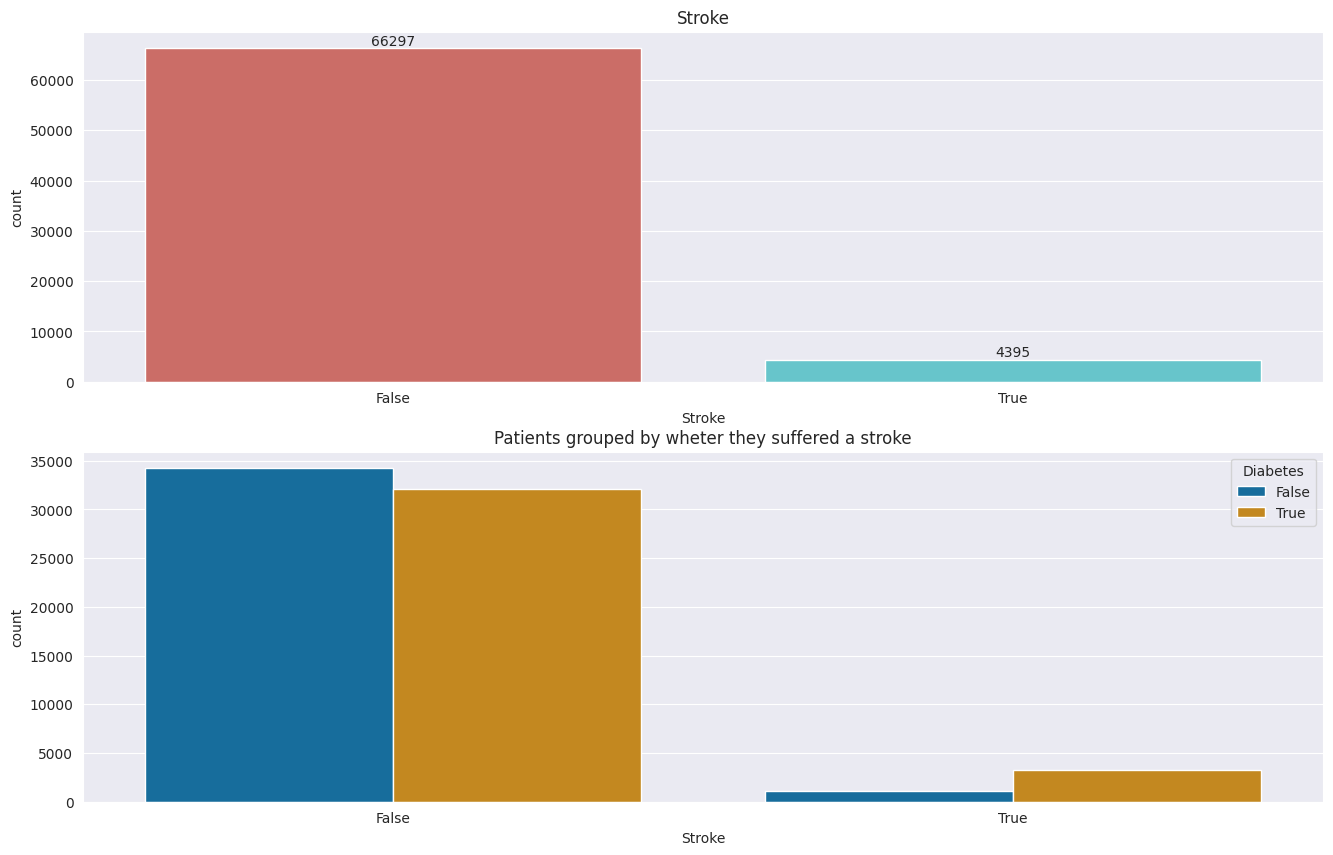

In [18]:
univ_ds_c(df, "Stroke", "Stroke", "Patients grouped by wheter they suffered a stroke")

- For this feature a large majority of people are in one category, but the small part that has suffered a stroke is very likely to have diabetes as well. 
- The last feature we will explore is `HighBP`.

,Frequency,Relative frequency
HighBP,,
Normal,39832,0.563458
High,30860,0.436542


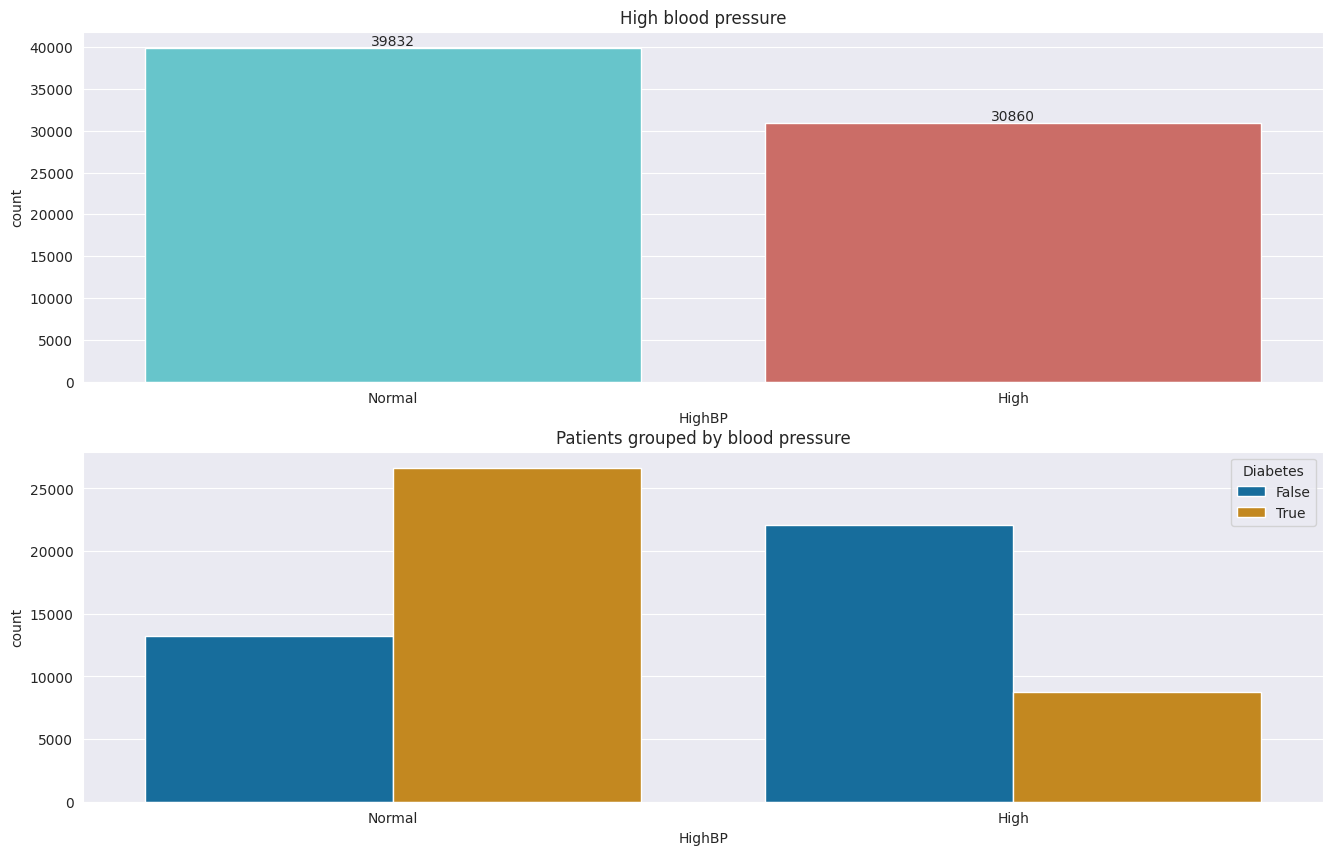

In [19]:
univ_ds_c(df, "HighBP", "High blood pressure", "Patients grouped by blood pressure")

- It might be surprising, but a majority of the individuals we have in our data have high blood pressure.
- The major part of people frm the group with high blood pressure are also diabetics, with the opposite being true for the other group. With that in mind, this feature could be a good indicator of diabetes.
- To finish this section off, we will check if we have a balanced dataset.

,Frequency,Relative frequency
Diabetes,,
False,35346,0.5
True,35346,0.5


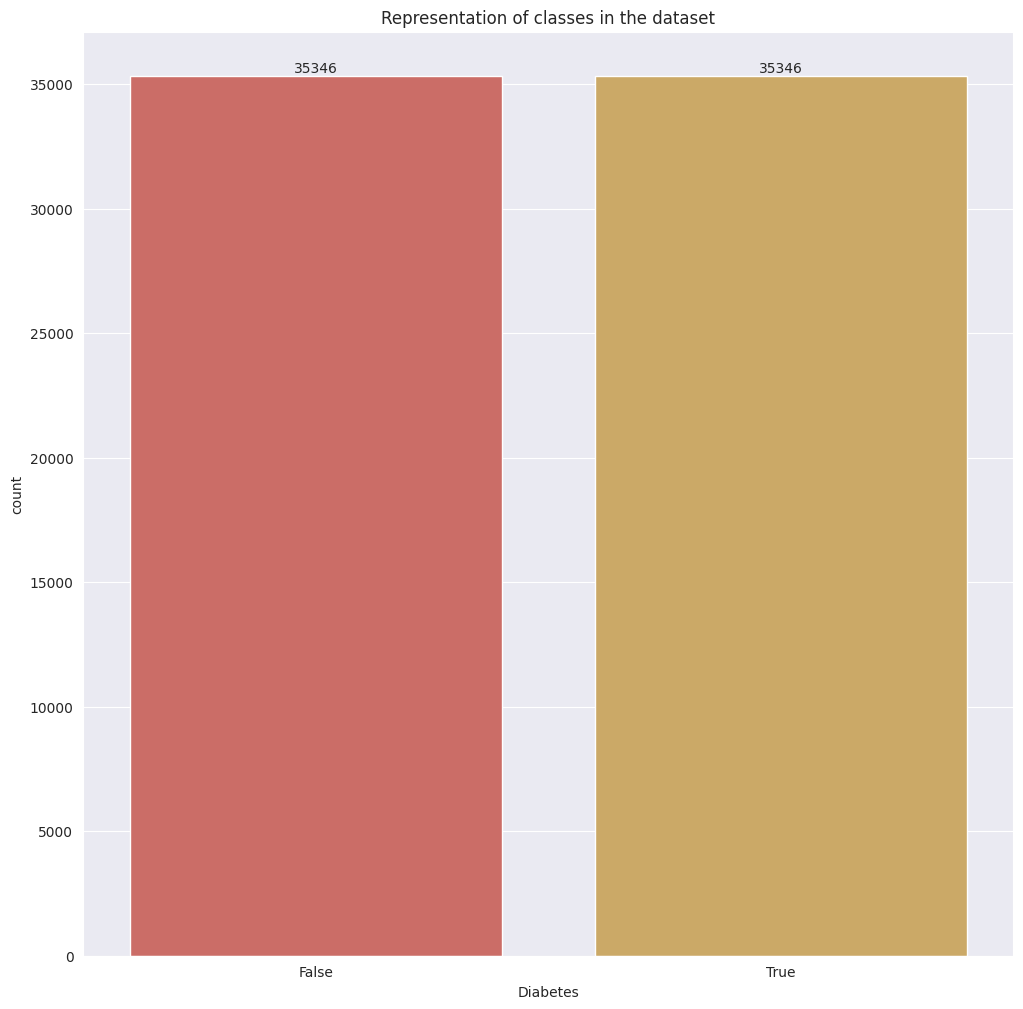

In [20]:
stats_df = pd.DataFrame(data={
        'Frequency': df["Diabetes"].value_counts(),
        'Relative frequency': df["Diabetes"].value_counts(normalize=True) 
})
display(stats_df)
fig, ax1 = plt.subplots(1, figsize=(12, 12))
sns.countplot(data=df, x="Diabetes", hue="Diabetes", order=df["Diabetes"].value_counts().index, ax=ax1).set(title="Representation of classes in the dataset")
for cont in ax1.containers:
    ax1.bar_label(cont)

- There is the exact same number of diabetics as healthy individuals in the available data.
- We will now examine the correlation between the numerical fetures in the dataset.

<Axes: >

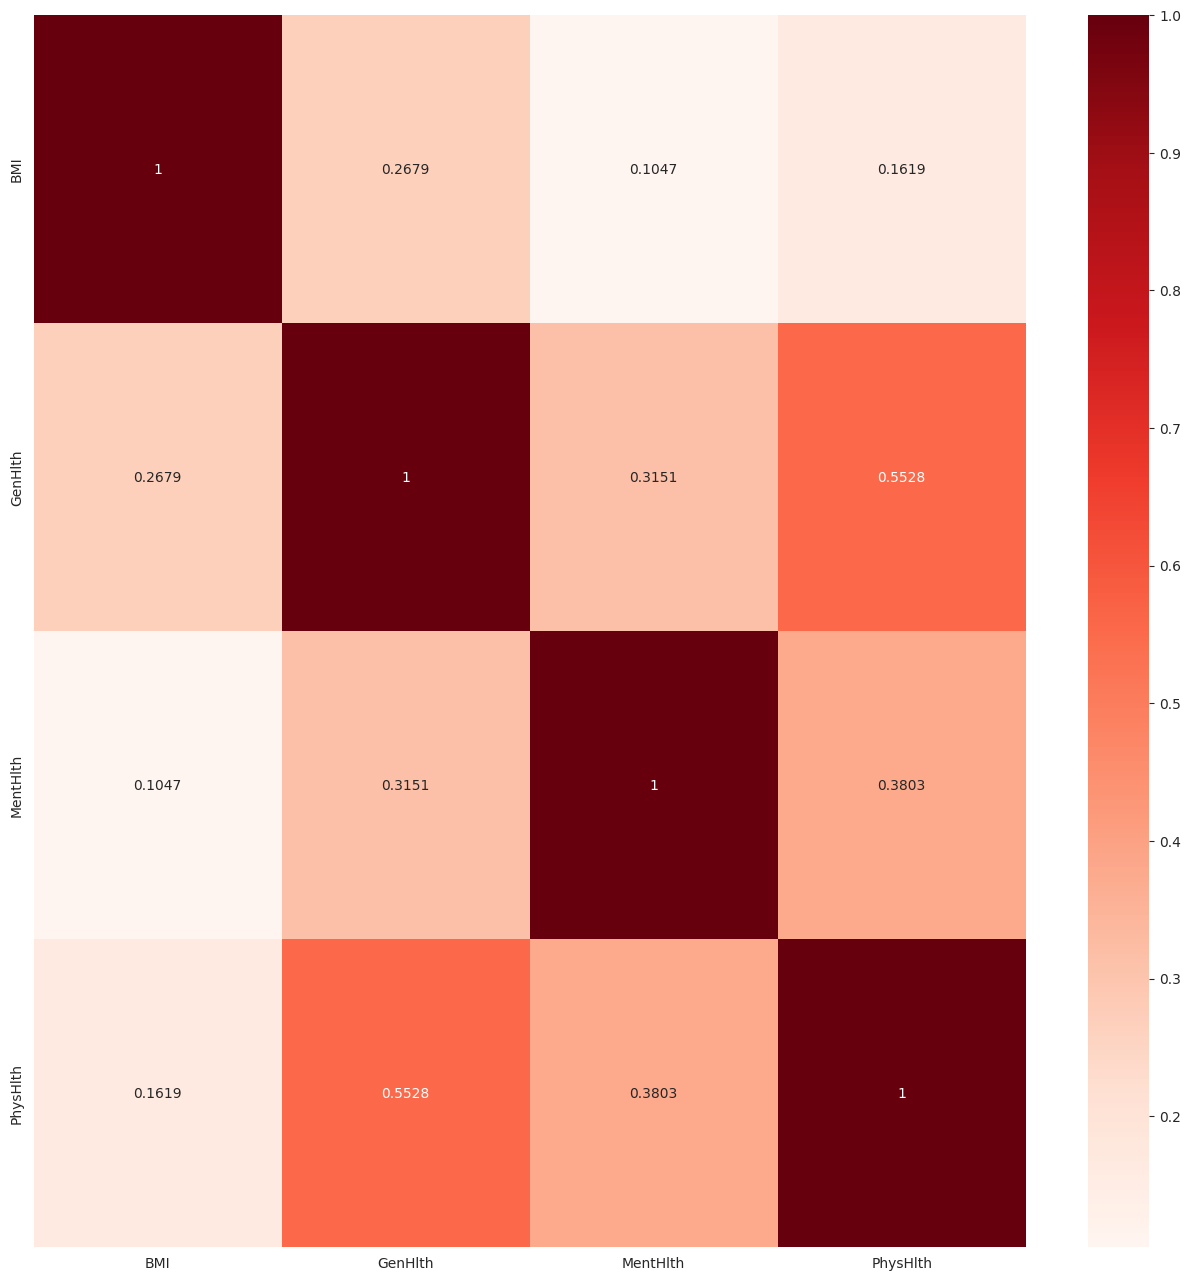

In [21]:
fig, ax1 = plt.subplots(1, figsize=(16,16))
sns.heatmap(df[["BMI", "GenHlth", "MentHlth", "PhysHlth"]].corr().round(4), cmap='Reds', annot=True, fmt='g', ax=ax1)

- The correlation matrix contains relatively small numbers, with the only slightly elevated value being correlations between the features describing health of the patient.

### Missing values and outliers
- We will focus on missing values first.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   70692 non-null  category
 1   Sex                   70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  int64   
 5   Smoker                70692 non-null  category
 6   HeartDiseaseorAttack  70692 non-null  category
 7   PhysActivity          70692 non-null  category
 8   Fruits                70692 non-null  category
 9   Veggies               70692 non-null  category
 10  HvyAlcoholConsump     70692 non-null  category
 11  GenHlth               70692 non-null  int64   
 12  MentHlth              70692 non-null  int64   
 13  PhysHlth              70692 non-null  int64   
 14  DiffWalk              70692 non-null  category
 15  St

- For the integer features there is no doubt about that from the information in the previous cell. From our previous examination of each feature, there were no categories, which represented missing values, so this dataset does not contain any missing values.
- Moving on to outliers.

In [23]:
df.describe()

,BMI,GenHlth,MentHlth,PhysHlth
count,70692.000000,70692.000000,70692.000000,70692.000000
mean,29.856985,2.837082,3.752037,5.810417
std,7.113954,1.113565,8.155627,10.062261
min,12.000000,1.000000,0.000000,0.000000
25%,25.000000,2.000000,0.000000,0.000000
50%,29.000000,3.000000,0.000000,0.000000
75%,33.000000,4.000000,2.000000,6.000000
max,98.000000,5.000000,30.000000,30.000000


- All features are either categorical or discrete and as we can gather from the table above and previous exploration, all of the recorded values lie in the correct range, the only feature we should examine is the `BMI`.
- The maximum value in the data for `BMI` is 98, which is still possible (could be a person that is 170cm tall and weighs 285kg) and the lowest value is 12 which is a severely underweight person but still theoretically possible.

### Preparation for model training
- In order to evaluate the quality of our model, we will split the dataset into three subsets called train, validation and test. The model will use the train subset for training, the validation subset will be used to prevent overfitting and the final subset will be used to estimate model performance on unseen data.
- Before we start training our models, we will encode categorical features back to their original versions. 

In [24]:
for col in df.select_dtypes('category').columns:
        df[col] = df[col].cat.codes
df = pd.get_dummies(df)
        
random_seed = 281        
Xtrain, Xrest, ytrain, yrest = train_test_split(df.drop(columns=["Diabetes"]), df["Diabetes"], test_size=0.4, random_state=random_seed)
Xtest, Xval, ytest, yval = train_test_split(Xrest, yrest, test_size=0.5, random_state=random_seed)

## Training and evaluation of models

### Decision trees
- The first model we will try out is the basic decision tree.
- **Hyperparameters**, whose best combination we will try to find are:
1. `criterion` this hyperparameter determines which criterion we use to judge the quality of the data partitioning into subsets. We will explore two possible values, namely information gain and Gini index.
2. `max_depth` this hyperparameter determines the maximal depth of the trees we will construct. The values we will consider will be integers from 1 through 15.
- **Loss function**, with which we will measure the predictive strength, which is the area under the ROC curve.
- The ROC curve is a way of evaluating the classification depending on the setting of the classification threshold. It uses TPR (the proportion of correctly predicted positive values with the total number of positive values) and FPR (the proportion of incorrectly predicted positive values with the total number of negative values).
- We will now explore combinations of the hyperparameter values and try to find the best performing combination.

In [25]:
t_roc = []
v_roc = []
 
param_g = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : range (1,15)
}
param_c = ParameterGrid(param_g)

for params in param_c:
    clf = DecisionTreeClassifier(**params, random_state=random_seed)
    clf.fit(Xtrain, ytrain)
    t_roc.append(metrics.roc_auc_score(ytrain, clf.predict_proba(Xtrain)[:, 1]))
    v_roc.append(metrics.roc_auc_score(yval, clf.predict_proba(Xval)[:, 1]))
    
best_params = param_c[np.argmax(v_roc)]
print(f"We found the best combination of hyperparameters to be {best_params}, with an AUC of {max(v_roc):.3f} on the validation set.")

We found the best combination of hyperparameters to be {'max_depth': 7, 'criterion': 'gini'}, with an AUC of 0.819 on the validation set.


- Now that we know what the best combination is we will examine the performance of the other combinations, using a visualisation.

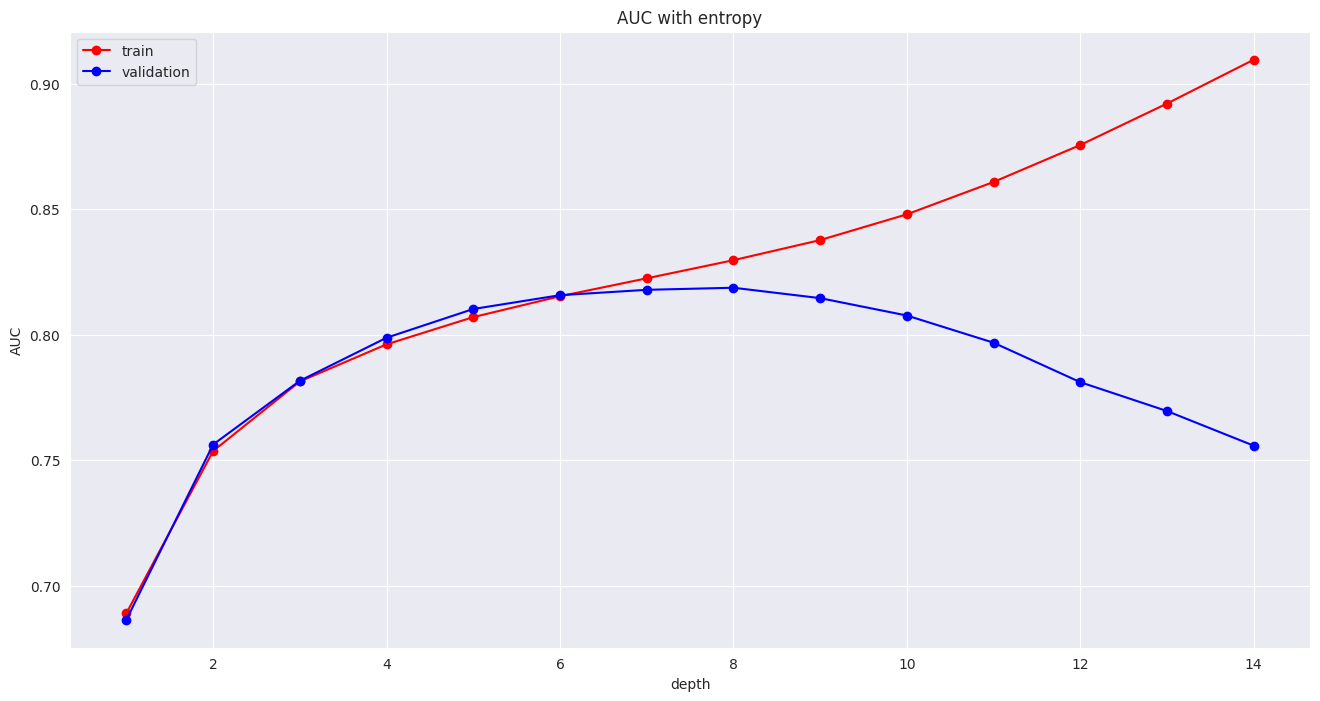

In [26]:
def plot_progress(train_roc, val_roc, title): 
    plt.figure(figsize=(16,8))
    plt.plot(range(1,15), train_roc, 'ro-')
    plt.plot(range(1,15), val_roc, 'bo-')
    plt.xlabel('depth')
    plt.ylabel('AUC')
    plt.legend(['train', 'validation'])
    plt.title(title)
    plt.show()

# results with entropy as a criterium
t_roc_e = t_roc[:len(v_roc)//2]
v_roc_e = v_roc[:len(v_roc)//2]
plot_progress(t_roc_e, v_roc_e, "AUC with entropy")

- We can clearly see that the performance on the validation subsets rose with the increasing depth up to 8 with a gradual decline after that point, caused by overfitting which can be seen from the AUC on training data still improving.  
- Now we will make a similar visualisation for the Gini index as a criterion, where we should see the best performance overall. 

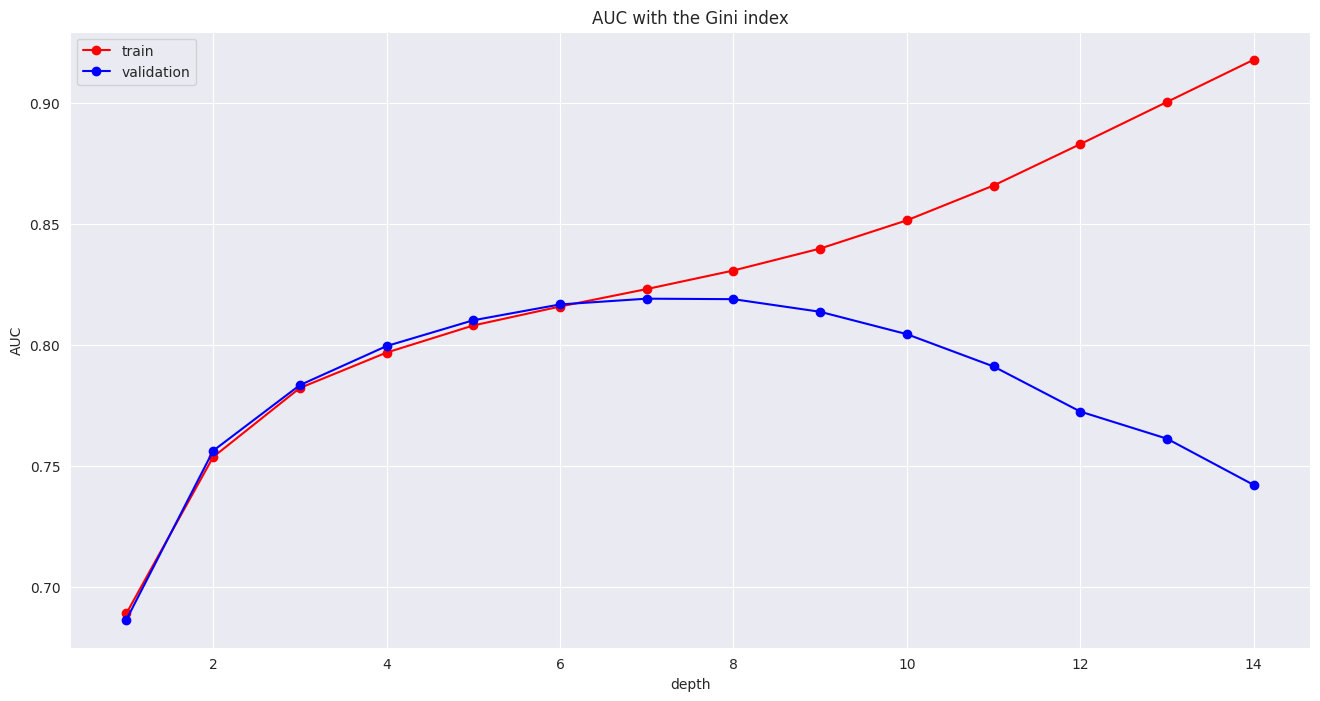

In [27]:
# Gini index
t_roc_g = t_roc[len(t_roc)//2:]
v_roc_g = v_roc[len(v_roc)//2:]
plot_progress(t_roc_g, v_roc_g, "AUC with the Gini index")

- This is an extremely similar situation as in the previous graph, but the peak validation performance occured with the depth of 7.
- We can not easily visualise the decision boundary as we have too many features, but we will visualise the best decision tree itself.
- We will focus on the first few depth levels, otherwise the visualisation would be too confusing.

In [28]:
clf_opt = DecisionTreeClassifier(**best_params, random_state=random_seed)
clf_opt.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=7, random_state=281)

/home/mikulasko/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


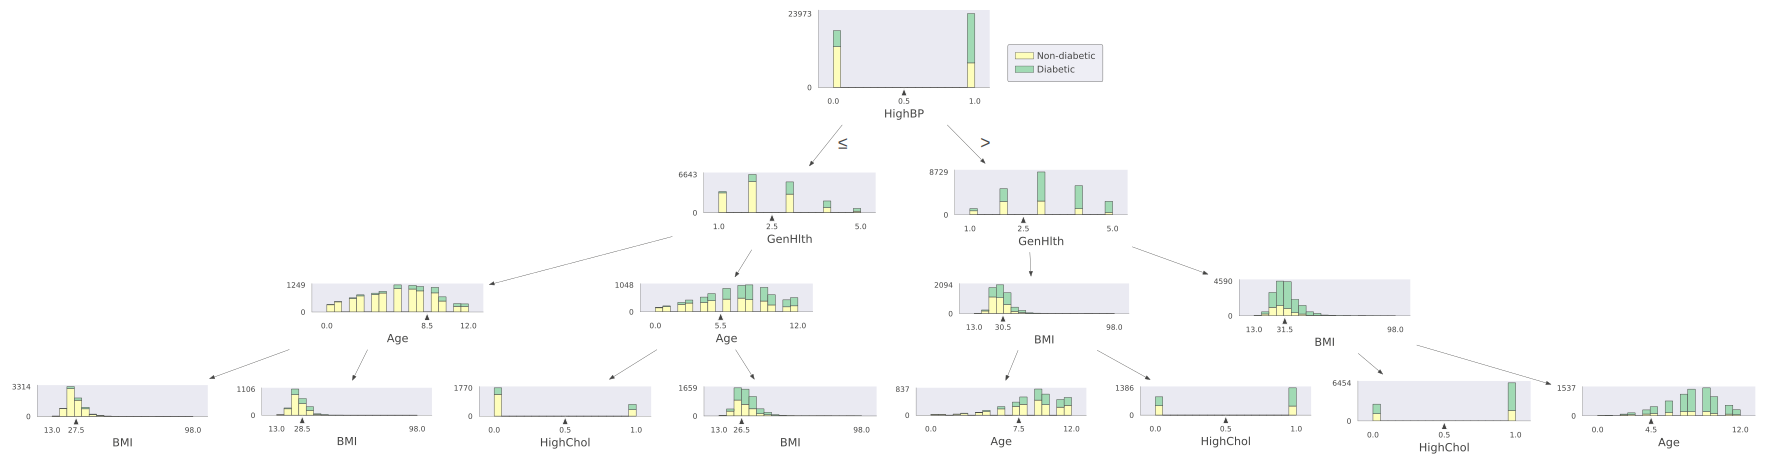

In [29]:
viz = model(
    clf_opt, Xtrain, ytrain,
    feature_names=Xtrain.columns,
    class_names=["Non-diabetic", "Diabetic"]
)
viz.view(depth_range_to_display=[0,3], scale=1.25)

- As we can see from this graph, the most important features for our models were `GenHlth`, `Age`, `BMI` or `HighChol`, none of which are very surprising.

- To round out this section, we will visualise the ROC curve for the best performing model.

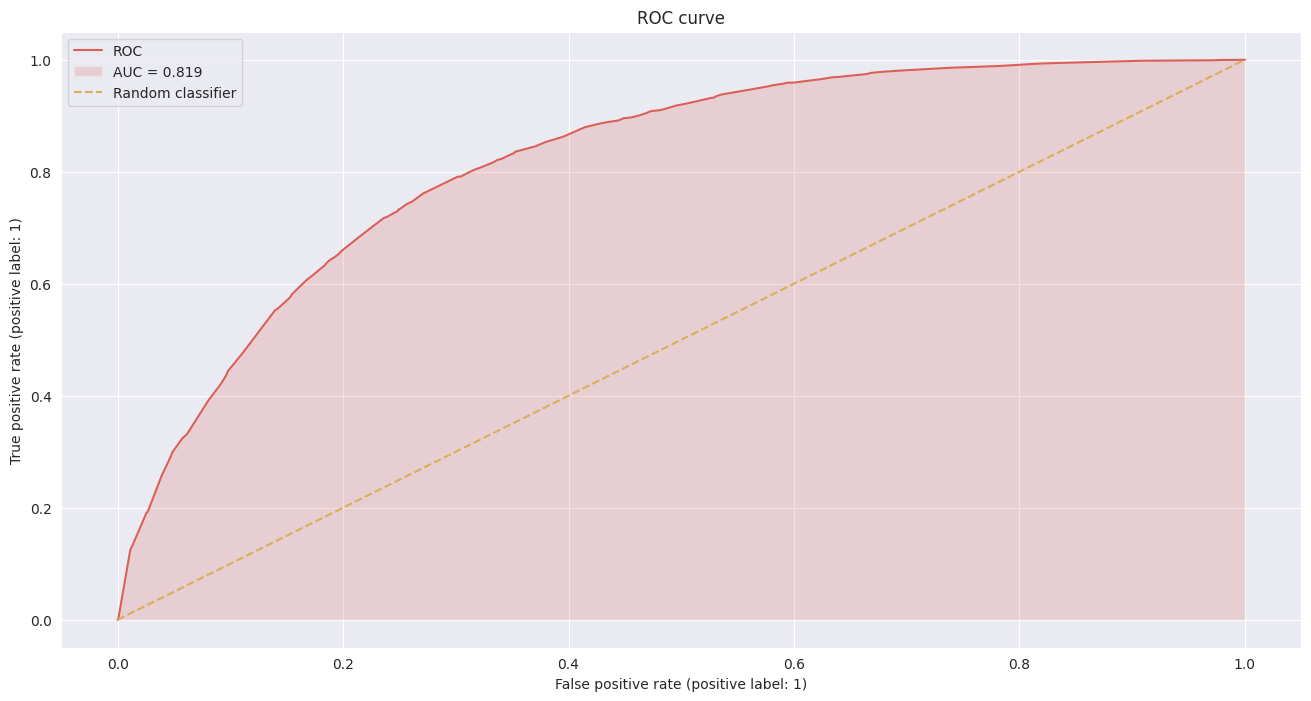

In [30]:
def plot_roc(clf):
    probs = clf.predict_proba(Xval)[:,1]
    fpr1, tpr1, _ = metrics.roc_curve(yval, probs)
    fig, ax = plt.subplots(figsize=(16,8))
    # ROC curve
    ax.plot(fpr1, tpr1, label='ROC')
    # area under the curve
    ax.fill_between(fpr1, tpr1, alpha=0.2, label='AUC = {:.3f}'.format(metrics.roc_auc_score(yval, probs)))
    # random classifier
    ax.plot([0,1], [0,1], '--', label='Random classifier')
    ax.legend()
    ax.set_xlabel('False positive rate (positive label: 1)')
    ax.set_ylabel('True positive rate (positive label: 1)')
    _ = ax.set_title('ROC curve')


plot_roc(clf_opt)

- The ROC curve is not too impressive as we would like the TPR to rise faster.
- In search of improved performance, we will try a different machine learning model.

### Explainable Boosting Machine
- The model we have chosen to continue with is the Explainable Boosting Machine.
- This is an implementation of a Generalized Additive Model with automatic interactions. It also provides many visualisations, with which we can easily understand why the model behaves a certain way, as well as explanations for each prediction, allowing us to explore where our model might fail.

In [31]:
ebm = ExplainableBoostingClassifier()
ebm.fit(Xtrain, ytrain)

auc = metrics.roc_auc_score(yval, ebm.predict_proba(Xval)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.836


- This model performs slightly better than the decision tree. So we will select it as our final model.
- Let's take a look at the model itself (note that you may need to rerun the notebook to be able to see the interactive visualisations below).

In [32]:
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/140578177715024/ -->

- From the summary graph, we can see that one feature this model puts more emphasis on the `HighBP` feature compared to the previous model.
- The other visualisation allow us to explore relationships between each feature and how much it contributes to the prediction.
- For example for the `Age` feature we get an increasing function, which seems logical, but for a feature like `BMI`, we can see a dip in the value with increasing BMI after a certain point, which does not seem reasonable and might be a sign of slight overfitting.
- We can use these graphs to determine whether we need to fine-tune the model more or if we are satisfied. We will not be trying to improve this model further.
- Now we will visualise the ROC curve as well as provide the AUC score we might expect on unseen data.

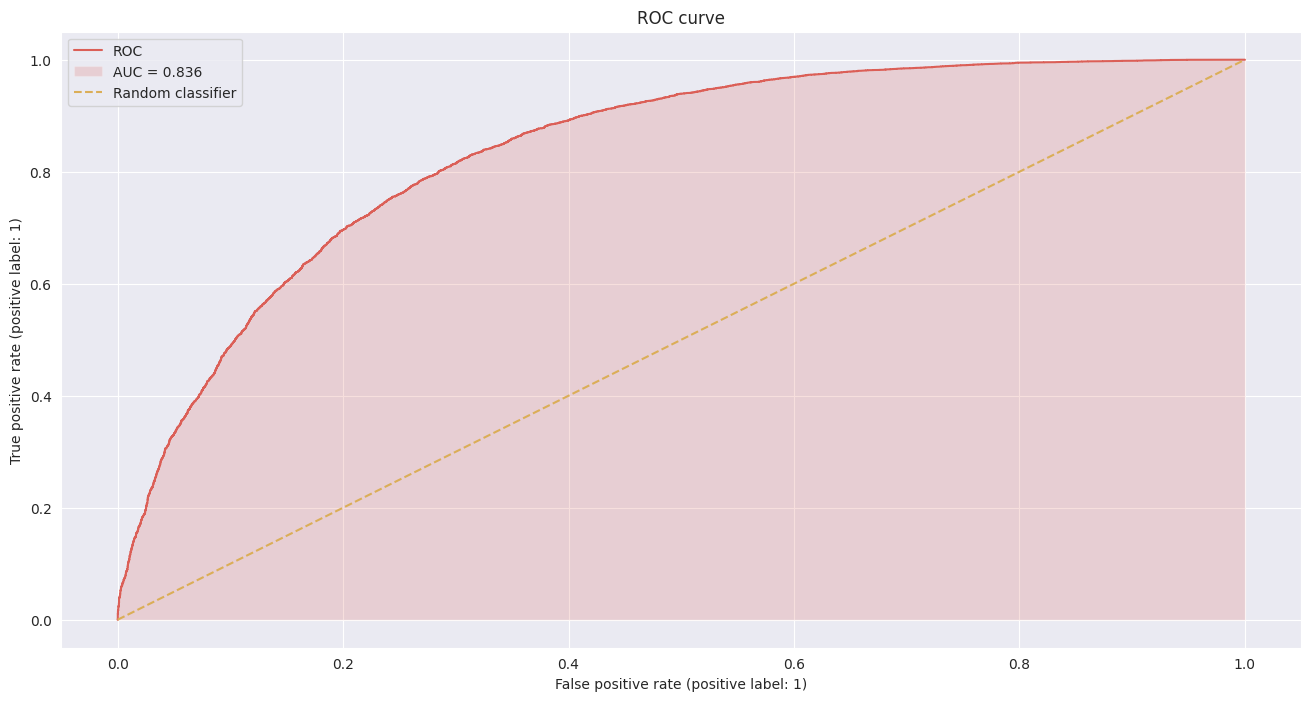

In [33]:
plot_roc(ebm)

In [36]:
auc = metrics.roc_auc_score(ytest, ebm.predict_proba(Xtest)[:, 1])
print("On unseen data we can expect an AUC score of {:.3f}.".format(auc))

On unseen data we can expect an AUC score of 0.830.
